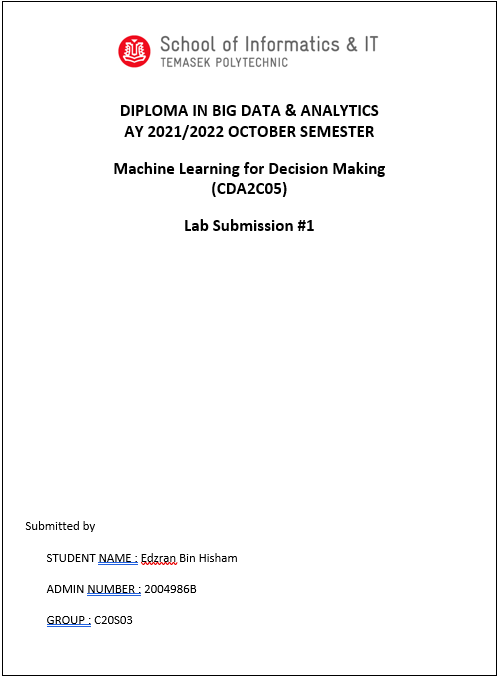

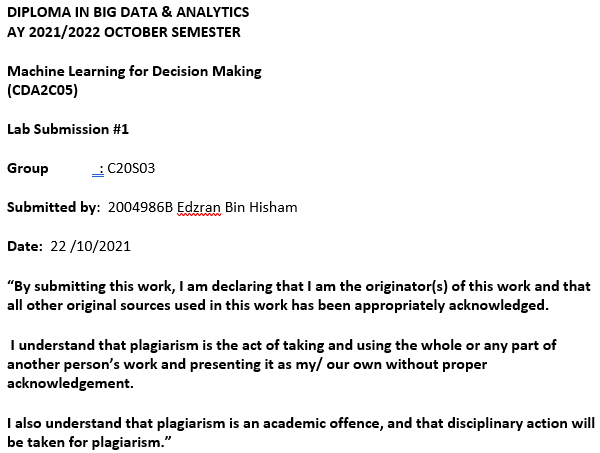

# <span style='color:maroon'> Introduction </span>

The project using dataset derived from an US based bank, Lending Club (https://www.lendingclub.com/). Dataset was adapted from the Lending club. Some modifications were made for the purpose of this project.
An US bank would like to improve its financial performance with regards to approval of new loans. Based on the given historical dataset, you are to plan and train a prediction model, to understand the importance of features, and how the bank should approach towards approval of new loans.


# <span style='color:maroon'> TPEZM Statement </span>

### Task

Loan charged-off prediction based on historical records of client financial profile generated

### Performance

- Confusion Matrix
- Recall and Precision
- MCC
- AUC
- Precision Recall Curve(for moderate to large class imbalance)

### Experience
- Historical records of client loans that had been deemed charged-off or fully paid
- Historical records of clients financial profile such as: FICO score, income & employment history, debt-to-income ratio, value of customer's collateral, loan term etc
- Demographic variables such as age, employment status, relationship status
- Behavioural variables such as next payment date, EMI, delinquency etc.

### Environment NoiZe

- Lack of data for minority borrowers applying for loans. e.g. Low-income groups have limited credit histories leading to misallocation of credit.
- Inconsistent data collection
- Redundant information not related or helpful to loan prediction e.g. ethnicity

### Model
- Decision Tree Classifier
- Random Forest Classifier

# <span style='color:maroon'> Packages </span>

In [2]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report # prints various metrics such as precision, recall, f1 score, macro avg, weighted avg
from imblearn.pipeline import Pipeline # to create pipeline to automate steps/workflow
from sklearn.model_selection import train_test_split # train test split data into training and testing 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold # import type of cross validation method 
from imblearn.over_sampling import RandomOverSampler # RandomOverSampler resample method
from imblearn.combine import SMOTETomek # SMOTE with Tomek links resample method
from sklearn.metrics import precision_score, recall_score, accuracy_score, matthews_corrcoef # import metrics used to evaluate classification models
randomstate = 2004986
pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

999

# <span style='color:maroon'> Data Understanding </span>

In [3]:
#loading the dataset
df_loan = pd.read_csv('C:/Users/User/Desktop/TP Y2(Sem2)/Machine Learning for Decision Making/Assignment/LendingLoanClub.csv')
df_loan.head()

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,installment*term,term,installment,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint
0,1227221,FedEx,Individual,MORTGAGE,Fully Paid,24000,15.80%,34865.4,60,581.09,...,10,6,11,0,1,100.0,100.0,0,0,NaN
1,1244543,Newland Medical Associates,Individual,MORTGAGE,Fully Paid,35000,21.00%,56812.2,60,946.87,...,18,4,9,0,1,100.0,60.0,0,0,NaN
2,1372036,Spirit Aero Systems,Individual,MORTGAGE,Fully Paid,16800,11.55%,22194.0,60,369.90,...,10,4,14,0,3,100.0,25.0,0,0,NaN
3,1545038,MidAtlantic Farm Credit,Individual,MORTGAGE,Fully Paid,25200,12.12%,33725.4,60,562.09,...,24,8,16,0,1,100.0,11.1,0,0,NaN
4,3005981,Damco,Individual,RENT,Fully Paid,12000,16.29%,17620.2,60,293.67,...,17,8,13,0,2,100.0,80.0,0,0,NaN


In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43903 entries, 0 to 43902
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43903 non-null  int64  
 1   emp_title                       40645 non-null  object 
 2   application_type                43903 non-null  object 
 3   home_ownership                  43903 non-null  object 
 4   loan_status                     43903 non-null  object 
 5   loan_amnt                       43903 non-null  int64  
 6   int_rate                        43903 non-null  object 
 7   installment*term                43903 non-null  float64
 8   term                            43903 non-null  int64  
 9   installment                     43903 non-null  float64
 10  grade                           43903 non-null  object 
 11  issue_d                         43903 non-null  object 
 12  last_pymnt_d                    

In [4]:
df_loan.describe()

,id,loan_amnt,installment*term,term,installment,annual_inc,annual_inc_joint,dti,dti_joint,delinq_2yrs,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint
count,4.390300e+04,43903.000000,43903.000000,43903.000000,43903.000000,4.390300e+04,4.809000e+03,43843.000000,4809.000000,43903.000000,...,43903.000000,43903.000000,43903.000000,43903.000000,43903.000000,43898.000000,43260.000000,43903.000000,43903.000000,4809.000000
mean,1.122958e+08,14736.439993,19354.747357,42.784593,440.342642,7.699224e+04,1.170871e+05,19.390316,19.372551,0.313623,...,13.113386,5.254584,11.393344,0.087352,2.070701,93.904524,37.760942,0.138373,0.037332,30570.457476
std,2.621741e+07,9537.260821,13534.698299,10.807506,282.084316,9.046731e+04,5.723870e+04,21.185848,7.728927,0.933860,...,7.826561,3.199114,5.686634,0.586393,1.827154,9.565307,36.116946,0.358500,0.375852,25195.690812
min,1.227221e+06,1000.000000,273.960000,36.000000,7.610000,0.000000e+00,2.300000e+04,0.000000,0.280000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,7.900000,0.000000,0.000000,0.000000,0.000000
25%,1.138464e+08,7200.000000,8741.880000,36.000000,234.580000,4.500000e+04,8.006800e+04,11.780000,13.800000,0.000000,...,7.000000,3.000000,7.000000,0.000000,1.000000,91.000000,0.000000,0.000000,0.000000,13454.000000
50%,1.172805e+08,12000.000000,15902.280000,36.000000,365.310000,6.500000e+04,1.060000e+05,17.850000,19.030000,0.000000,...,12.000000,5.000000,10.000000,0.000000,2.000000,100.000000,33.300000,0.000000,0.000000,23926.000000
75%,1.241521e+08,20000.000000,27076.320000,60.000000,585.965000,9.100000e+04,1.401920e+05,24.670000,24.700000,0.000000,...,17.000000,7.000000,14.000000,0.000000,3.000000,100.000000,66.700000,0.000000,0.000000,40281.000000
max,1.264173e+08,40000.000000,79114.200000,60.000000,1717.630000,1.099920e+07,1.058000e+06,999.000000,39.970000,36.000000,...,107.000000,36.000000,74.000000,36.000000,23.000000,100.000000,100.000000,6.000000,44.000000,357135.000000


In [5]:
# Check for duplicated values
df_loan.duplicated().sum()

0

Takeaway:
- Missing values in some columns are expected customer do not meet certain requirements to fill those columns, or could be optional. Therefore, not missing at random.
- However, to use those columns we cannot have so many missing values and data cleaning would need to be performed on those columns before it is capable to be used in my models
- No duplicates which is good
- Our target value loan_status which indicates whether the customer "Charged-Off" or "Fully Paid" is in object data type. Thus will need to transform into binary format before modeling 

# <span style='color:maroon'> Exploratory data analysis </span>

#### Countplot: Loan_status

Loan_status is my target variable. At a glance, there is imbalanced data. There are much more customers who fully paid(approx 34000) vs customers who charged off(approx 9000). 

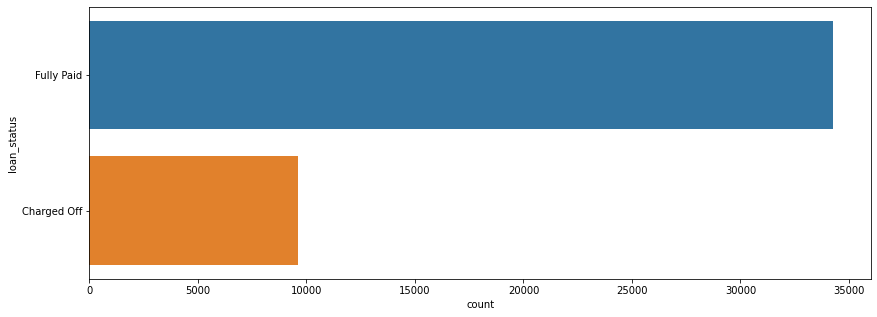

In [6]:
plt.figure(figsize=(14,5))
sns.countplot(y="loan_status", data=df_loan)
plt.show()

### Feature correlation to 'loan_status'

In [7]:
df_copy = df_loan.copy()
df_copy['loan_status'] = df_copy['loan_status'].apply(lambda x:1 if 'Fully Paid' in x else 0)
corr_mat=df_copy.corr()
#Correlation with target
cor_target=abs(corr_mat['loan_status'])
#threshold to select only highly relevant features
relevant_features=cor_target[cor_target>0.1]
relevant_features

id                         0.114128
loan_status                1.000000
installment*term           0.112871
term                       0.122702
dti_joint                  0.109932
total_pymnt                0.297240
total_rec_prncp            0.422773
total_rec_late_fee         0.173417
open_rv_24m                0.101917
recoveries                 0.531874
collection_recovery_fee    0.525685
Name: loan_status, dtype: float64

- The top 2 most correlated features with my target variable is column 'recoveries' and 'collection_recovery_fee'. 
- Taking a look at the definition of these 2 columns, both could be possible target leakages.  According to the data dictionary, 'recoveries' is defined as "Post charge off gross recovery". And 'collection_recovery_fee' is defined as 'Post charge off collection fee'. Therefore, the these 2 columns are possible target leakages as when there is fees collected, it means that a charge off has already happened. I will try to validate this more

Using this feature correlation information, I will explore more of how some of these features correlate to our target below

### Barplot: To discover possible target leakage of 'recoveries' and 'collection_recovery_fee' to 'loan_status'

Definition of 'Recoveries':<br>
Post charge off gross recovery

Definition of 'collection_recovery_fee':<br>
Post charge off collection fee


In [4]:
# make a copy in order not to modify original dataframe
df_copy = df_loan.copy()
# rows in 'recoveries' column that contain gross recovery fees will be labeled as the 'has data'
df_copy.loc[df_copy['recoveries'] > 0, 'recoveries'] = 'has data'
# rows in 'recoveries' column that DO NOT contain gross recovery fees will be labeled as 'no data'
df_copy.loc[df_copy['recoveries'] == 0, 'recoveries'] = 'no data'
# rows in 'collection_recovery_fee' column that contain recovered fees will be labeled as the 'has data'
df_copy.loc[df_copy['collection_recovery_fee'] > 0, 'collection_recovery_fee'] = 'has data'
# rows in 'collection_recovery_fee' column that DO NOT contain recovered fees will be labeled as the 'has data'
df_copy.loc[df_copy['collection_recovery_fee'] == 0, 'collection_recovery_fee'] = 'no data'

# making sure values are changed
print(df_copy['recoveries'].unique())
print(df_copy['collection_recovery_fee'].unique())

['no data' 'has data']
['no data' 'has data']


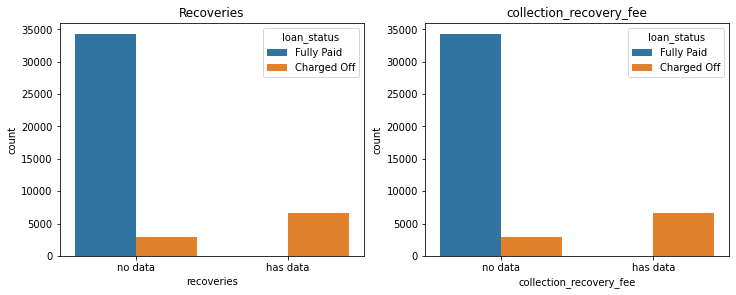

In [9]:
plt.figure(figsize=(12, 30))

# first subplot to show 'recoveries' column 
plt.subplot(6, 2, 1)
sns.countplot(x='recoveries', data=df_copy, hue='loan_status')
plt.title('Recoveries')

# second subplot to show 'collection_recovery_fee' column 
plt.subplot(6, 2, 2)
sns.countplot(x='collection_recovery_fee', data=df_copy, hue='loan_status')
plt.title('collection_recovery_fee')

plt.show()

Takeaway:

My initial speculation of these 2 columns were correct. I can see that when there is data(basically any recovered amount which is more than 0) in 'recoveries' and 'collection_recovery_fee' columns, there will ONLY be one distinct variable related to rows that have data in these 2 columns. Which are charged off customers. 

There will not be any fully paid loan customers when there is data in these 2 columns. 

This can be seen from the 'has data' bin containing only charged off customers. Therefore, these 2 columns should be excluded during modeling to prevent target leakage during predicting of charged off customers.



In [3]:
df_loan.drop(['collection_recovery_fee','recoveries'], axis=1, inplace=True)

### "total_rec_prncp" with reference to "loan_status"

As previously discovered in the feature correlation calculation above, one of the other higher correlated features to our target variable is feature "total_rec_prncp".

"total_rec_prncp" is defined as:
The total principle received to date. According to investopedia, in the context of borrowing, principal is the initial size of a loan; it can also be the amount still owed on a loan. Therefore, "total_rec_prncp" is the column that calculates the total received principle(money) owed from a loan.

<AxesSubplot:xlabel='loan_status', ylabel='total_rec_prncp'>

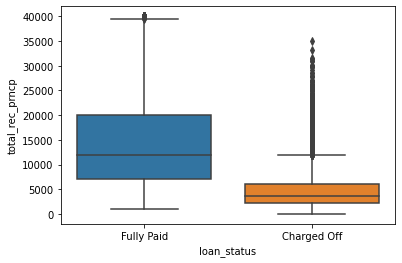

In [29]:
import seaborn as sns

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="loan_status", y="total_rec_prncp", data=df_loan)

In [30]:
from scipy.stats import pearsonr # for calculating correlation coefficient relationship between 2 variables
corr, _ = pearsonr(df_loan['total_rec_prncp'], df_loan['total_pymnt'])
print('Pearsons correlation: ', corr)

Pearsons correlation:  0.9633883751778226


Takeaway:

- I can see that charged off loans will have lesser total principle received as compared to fully paid loans. This makes sense as charged off loans are loans that a company will no longer collect as the borrower has become delinquent on payments, according to Investopedia. 

- I can see that there are many outliers for the charged off box plot. One possbile reason for this is there are some customers who take up higher loans and have made high amount of payments for their loans but became delinquent after awhile. Causing them to be charged off.

- Full paid loans will of course have higher total principle received as majority of customers fully paid of their loans, as seen from the very first barplot.
- 'total_rec_prncp' and 'total_pymnt' are similar columns and are highly correlated with each other. 'total_pymnt' is defined as "Payments received to date for total amount funded". 


### Histplot: "installment" with reference to "loan_status"

Installment is defined as: Amount paid per term

<AxesSubplot:xlabel='installment', ylabel='Count'>

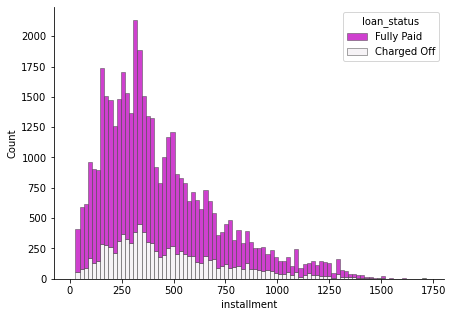

In [43]:
import matplotlib as mpl
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(x="installment", hue='loan_status',data=df_loan, multiple="stack", 
             palette="light:m_r",edgecolor=".3",linewidth=.5)

In [44]:
df_loan['installment'].describe()

count    43903.000000
mean       440.342642
std        282.084316
min          7.610000
25%        234.580000
50%        365.310000
75%        585.965000
max       1717.630000
Name: installment, dtype: float64

- I can generally see that the data of installment with reference to loan_status is right skewed. 
- Loans are often paid in around the 200 to 500 range, with the average being 440 dollars per term
- There are outliers where loans are paid 1000dollars++ per term. Probably due to customers who have applied for a heftier loan

### Subplots of Barplots: "term", "home_ownership", "verification_status" and "purpose" with reference to "loan_status"

Doing a subplot to fit multiple plots in one cell, to have a quicker view and analysis of multiple features relating to my target

term: 
- The number of payments on the loan. Values are in months and can be either 36 or 60.

home_ownership: 
- The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

verification_status:
- Indicates if income was verified by LC, not verified, or if the income source was verified

purpose:
- A category provided by the borrower for the loan request. 






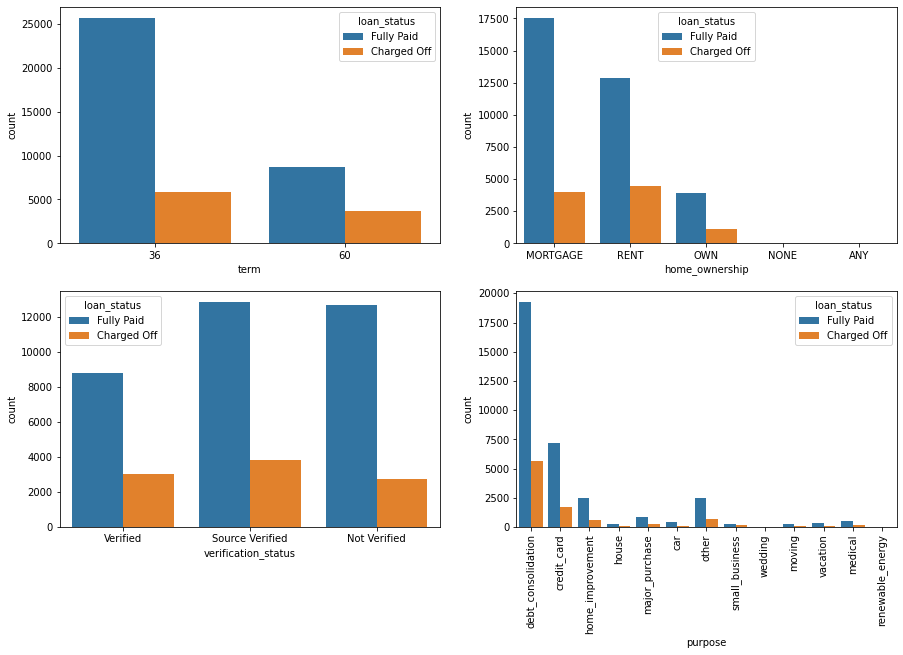

In [11]:
#figure size setting which is most appropriate for my to see 4 plots together
plt.figure(figsize=(15, 20))

# subplot for term feature wrf to target
plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df_loan, hue='loan_status')

# subplot for home_ownership feature wrf to target
plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df_loan, hue='loan_status')

# subplot for verification_status feature wrf to target
plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df_loan, hue='loan_status')

# subplot for purpose feature wrf to target
plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df_loan, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [56]:
print(df_loan['home_ownership'].value_counts())

MORTGAGE    21502
RENT        17365
OWN          5034
ANY             1
NONE            1
Name: home_ownership, dtype: int64


Term: 
- More customers take up 36 month term to pay their loans as compared to 60 month term.
- Customers who take up 60 month term have a higher proportion of being charged off as compared to customers who take 36 month term. This can be seen in the 60 month term bin where proportion of charged off customers are almost half of fully paid customers
- Customers who take up 36 month loan term often fully pay off their loans

Home Ownership:
- Most customers who take up loans are either paying mortgage for their house or are renting an apartment
- There are 2 classes 'none' and 'any' that only contain 1 observation each which could probably be excluded from the dataset as they are not useful due to having only 1 sample each

Verification_status:
- All 3 classes in this column seem to be almost evenly distributed
- Charged of loans are also about the same proportion in all 3 classes

Purpose:
- I can see that the top 3 reasons customers take up loans are for debt consolidation loans to refinance their debts, pay off their credit card debts or for house improvements.

In [4]:
# exluding 2 classes "NONE" and "ANY" in column home_ownership
df_loan = df_loan.loc[df_loan['home_ownership'].isin(['MORTGAGE', 'RENT', 'OWN'])]

In [36]:
#printing to check the classes left in column
df_loan['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

### Barplot: Correlation of Grade to loan_status

Definition of Grade:
LC assigned loan grade

In [30]:
#What are the unique values of Grade?

print('Unique values of Grade:', df_loan['grade'].unique())

Unique values of Grade: ['C' 'E' 'B' 'D' 'F' 'A' 'G']


<AxesSubplot:xlabel='grade', ylabel='count'>

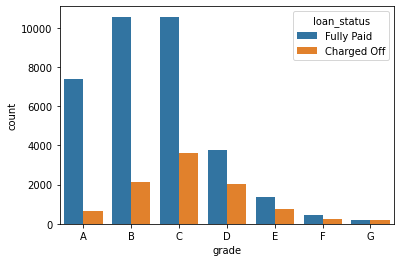

In [31]:
#sorting grade in descending order from A - G
grade = sorted(df_loan.grade.unique().tolist())
# plot counts of each unique grade in 'grade' column
sns.countplot(x='grade', data=df_loan, hue='loan_status', order=grade)

- Generally I can see that majority of loans are assigned to grades A, B and C. 
- Loans A, B and C are often fully-paid back as well. 
- As we descend alphabetically, the proportion of charged off to fully paid loans increase. 
- Loans F and G are contain loans often charged off. I will take a look further at grades F and G.

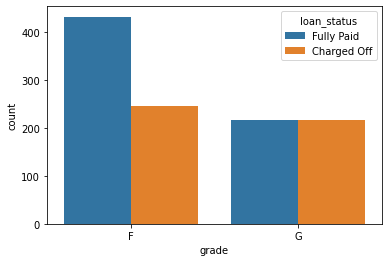

In [32]:
# taking only rows containing grade == 'F' and 'G' and storing result into df_grade
df_grade = df_loan[(df_loan.grade == 'F') | (df_loan.grade == 'G')]

grade = sorted(df_grade.grade.unique().tolist())
# plot counts of each unique grade in 'grade' column which are only now showing rows containing grades 'F' and 'G'
sns.countplot(x='grade', data=df_grade, hue='loan_status', order=grade)
plt.show()

I can further see that loans F and G contain high proportions of charged off loans, and can be especially seen in grade G where fully paid and charged off loans are equal or almost equal.

Therefore, I can infer that the lower a grade assigned to a loan, the higher the chances of the loan to be charged off.

# <span style='color:maroon'> Preprocessing </span>

- Remove or fill any missing data
- Remove uneccesary or repetetive features
- Removing highly correlated features
- Convert categorical values to numerical for modeling

#### Finding percentage of missing values in each column

As a rule of thumb, features that contain more than 10% of missing values will be dropped. Because it's generally very difficult to accurately impute data with lots of missing values which may introduce bias into the feature or possible data leakage, I will drop such columns. 

In [5]:
df_loan.shape

(43901, 76)

In [6]:
# finidng percetage of missing values for each column
missing_val_perc = df_loan.isna().mean().round(4) * 100
print(missing_val_perc[missing_val_perc>10])

annual_inc_joint                  89.05
verification_status_joint         89.05
dti_joint                         89.05
mths_since_last_record            84.34
mths_since_last_major_derog       73.65
mths_since_recent_bc_dlq          77.48
mths_since_recent_inq             10.36
mths_since_last_delinq            51.49
mths_since_recent_revol_delinq    67.42
revol_bal_joint                   89.05
dtype: float64


In [5]:
df_loan.drop(['annual_inc_joint', 'verification_status_joint','dti_joint','mths_since_last_record',
            'mths_since_last_major_derog','mths_since_recent_bc_dlq','mths_since_recent_inq',
            'mths_since_last_delinq','mths_since_recent_revol_delinq','revol_bal_joint'],axis=1,inplace=True)

In [7]:
df_loan.shape

(43901, 66)

76 columns are now reduced to 66 columns

#### Drop any missing values

In [9]:
# finidng percetage of missing values for each column
missing_val_perc = df_loan.isna().mean().round(4) * 100
print(missing_val_perc[missing_val_perc!=0])

emp_title               7.42
dti                     0.14
inq_fi                  5.68
inq_last_12m            5.68
open_acc_6m             5.68
mths_since_recent_bc    1.36
mths_since_rcnt_il      8.50
mo_sin_old_il_acct      2.94
open_il_12m             5.68
open_il_24m             5.68
open_rv_12m             5.68
open_rv_24m             5.68
max_bal_bc              5.68
avg_cur_bal             0.01
bc_open_to_buy          1.46
pct_tl_nvr_dlq          0.01
percent_bc_gt_75        1.46
dtype: float64


In [6]:
df_loan.dropna(inplace=True)

In [9]:
df_loan.shape

(36762, 66)

After dropping all missing values in my dataset, I am left with 36,762 rows of data. Which is still plenty of data for the machine learning algorithm to learn from. 

#### Dropping 'id'

ID is just a running number and not useful for our analysis, thus I will drop it

In [7]:
df_loan.drop('id', axis=1, inplace=True)

#### Dropping "emp_title"

In [13]:
df_loan["emp_title"].nunique()

15887

This column contains too many unique values for me to one-hot encode which would highly increase the dimensionality of my dataset. Thus i will drop this column.

In [8]:
df_loan.drop('emp_title', axis=1, inplace=True)

#### Converting "int_rate" into numerical

Currently, this column is showing numerical/percentage data but is in object data type. Therefore I will transform it into numerical

In [53]:
df_loan["int_rate"]

0        15.80%
1        21.00%
2        11.55%
3        12.12%
4        16.29%
          ...  
43898    12.62%
43899     9.93%
43900     6.72%
43901    28.72%
43902    10.42%
Name: int_rate, Length: 43901, dtype: object

In [9]:
# removing % by getting substring of each observation starting from -1 and store result
df_loan['int_rate'] = df_loan['int_rate'].str[:-1]
df_loan['int_rate'] = df_loan['int_rate'].astype(float)

In [16]:
df_loan['int_rate'].head()

1000    10.91
2496    16.02
2497    10.42
2498    30.79
2499    13.59
Name: int_rate, dtype: float64

#### Ordinal encode grade
Grade has a natural ranking order. A being the best grade given to a loan application, descending alphabetically. According to Investopedia - Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.

However using a ordinal encoding may not provide ordinal encoding the way I expected. Therefore, I will be encoding the column manually

In [47]:
df_loan['grade'].unique()

array(['C', 'E', 'B', 'D', 'F', 'A', 'G'], dtype=object)

In [10]:
## manual encoding by first creating a dictionary 
grade_dict = {'G':0,'F':1, 'E':2,'D':3,'C':4,'B':5, 'A':6}
# map the assign values
df_loan['grade'] = df_loan["grade"].map(grade_dict)

#### Dropping "issue_d" and "last_pymnt_d"

These features show timestamp data. 

'issue_d' is defined as - The month which the loan was funded. And 'last_pymnt_d' is defined as - Last month payment was received.

In theory, the company wouldn't know beforehand whether or not a loan would be issued when using our model for future customers, so in theory we wouldn't have an issue date or last payment date, therefore I will drop this feature.

In [18]:
print(df_loan["issue_d"].head())
print(df_loan["last_pymnt_d"].head())

1000    1/7/2017
2496    1/7/2017
2497    1/7/2017
2498    1/7/2017
2499    1/7/2017
Name: issue_d, dtype: object
1000     1/7/2019
2496     1/4/2019
2497     1/2/2020
2498     1/5/2019
2499    1/10/2019
Name: last_pymnt_d, dtype: object


In [11]:
df_loan.drop(['issue_d', 'last_pymnt_d'], axis=1,inplace=True)

#### Drop 'pymnt_plan'

Doing a .unique(), I can see that there is only 1 class in this column. Thus this column will not be useful in our analysis and in prediction thus I will drop it.

In [20]:
df_loan['pymnt_plan'].unique()

array(['n'], dtype=object)

In [12]:
df_loan.drop(['pymnt_plan'], axis=1,inplace=True)

#### Converting 'loan_status' from categorical to binary

In [13]:
df_loan['loan_status'] = df_loan['loan_status'].apply(lambda x:1 if 'Fully Paid' in x else 0)

In [17]:
df_loan['loan_status'].unique()

array([1, 0], dtype=int64)

In [18]:
df_loan.shape

(36762, 61)

Now left with 61 columns

After some preprocessing, let's take a look at the categorical columns I have left.

In [19]:
print(df_loan.select_dtypes('object'))

      application_type home_ownership verification_status             purpose  \
1000        Individual       MORTGAGE     Source Verified  debt_consolidation   
2496        Individual           RENT     Source Verified  debt_consolidation   
2497        Individual       MORTGAGE     Source Verified  debt_consolidation   
2498        Individual       MORTGAGE        Not Verified  debt_consolidation   
2499        Individual           RENT        Not Verified  debt_consolidation   
...                ...            ...                 ...                 ...   
43898       Individual           RENT        Not Verified         credit_card   
43899       Individual       MORTGAGE        Not Verified         credit_card   
43900       Individual       MORTGAGE     Source Verified         credit_card   
43901       Individual           RENT     Source Verified  debt_consolidation   
43902       Individual           RENT     Source Verified  debt_consolidation   

      initial_list_status  

The 5 remaining categorical columns are: 
- application_type
- home_ownership
- verification_status
- purpose 
- initial_list_status

In [14]:
# saving as checkpoint
df_loan.to_csv(r'C:\Users\User\Desktop\TP Y2(Sem2)\Machine Learning for Decision Making\Assignment\df_loan.csv',
                  index=False, header=True)

#### One-hot-encode rest of categorical features 

I will be using one-hot-encode through pd.get_dummies
- application_type 
- home_ownership
- verification_status
- purpose
- initial_list_status

In [26]:
df_loan = pd.get_dummies(df_loan)

df_loan.shape

(36762, 78)

My total number of features have now risen to 78

#### Splitting the dataframe into x(predictors) and y(target)

In [27]:
# X: predictors(variables used in prediction of target value)
# y: Target(value we want to predict) = "loan_status"
X = df_loan.drop(['loan_status'], axis=1)
y = df_loan['loan_status']


# <span style='color:maroon'> Modeling </span>

Defined as the 'M' in my TPEZM statement, I will be performing:

1. Decision Tree Classification
2. Random Forest Classification

#### Train_test_split data into 80% training 20% testing

In [28]:
randomstate=2004986 # for repeatability 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((29409, 77), (7353, 77), (29409,), (7353,))

##### Use collections.counter to count my y train and test values.

As from the very first EDA plot, I could see that my target column had an imbalance between the majority and minority class. Therefore, I use collections.counter to try and see if the proportion of majority and minority class would be the same after train test split. 

If the proportion is not similar in both training and testing, it could lead to worse performance. 1:"Fully paid", 0:"Charged Off".

In [29]:
import collections
print (collections.Counter(y_train))
print (collections.Counter(y_test))

Counter({1: 22886, 0: 6523})
Counter({1: 5708, 0: 1645})


In [31]:
print("Proportion of minority class to majority class in Training set: ", (6523/22886)*100)
print("Proportion of minority class to majority class in Testing set: ", (1645/5708)*100)

Proportion of minority class to majority class in Training set:  28.50214104692825
Proportion of minority class to majority class in Testing set:  28.819201121233355


The proportion of majority and minority classes are similar in both training and testing sets. Thus performing modeling on the testing set would be fair

#### Decision Tree Regressor

Note that i did not set max_depth parameter. This is just to gauge a baseline model for later improvements

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=randomstate)

dtc_model=dtc.fit(X_train, y_train)

print(dtc_model.score(X_train,y_train))
print(dtc_model.score(X_test,y_test))

1.0
0.9955120359037127


#### Random Forest Classification

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=randomstate)

rfc_model=rfc.fit(X_train, y_train)

print(rfc_model.score(X_train,y_train))
print(rfc_model.score(X_test,y_test))

1.0
0.9874881000951993


Takeaways:

Both DT and RF models are experiencing overfitting. This can be seen in both models where the training set has a perfect score of 1.0. The testing set also appears to quite a good score as well, both having 98% accuracy and abaove. Accuracy as a evaluation metric for classification problems can be misleading and this seems too good to be true. Thus I wil delve deeper

#### Calculate Evaluation metrics for DT and RF testing model

The metrics are:
- Accuracy Score
- Precision 
- Recall
- F1_score
- MCC (Mathews Correlation Coefficient)

In this business case, I will be prioritising Recall. Recall is a more important metric as opposed to Precision given that we’re more concerned with false negatives (our model predicting that someone is not gonna Charge Off but they do) than false positives (our model predicting that someone is gonna Charge Off but they don’t).

F1 Score provides a single score to measure both Precision and Recall.

MCC takes on the range of -1 to 1:
- 1 being perfect condition
- -1 being total disagreement 
- any value close to zero indicates a random guess

In [34]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, matthews_corrcoef
# make predictions from the DTC test set
y_dtc_pred_test = dtc_model.predict(X_test)
# make predictions from the RFC test set
y_rfc_pred_test = rfc_model.predict(X_test)
print("Evaluation metric for DTC test:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y_dtc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y_dtc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y_dtc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y_dtc_pred_test)))
print()
print("Evaluation metric for RFC test:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y_rfc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y_rfc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y_rfc_pred_test)))

Evaluation metric for DTC test:
precision_score: 0.99702
accuracy_score: 0.99551
recall_score: 0.99720
matthews_corrcoef: 0.98708

Evaluation metric for RFC test:
precision_score: 0.98414
accuracy_score: 0.98749
recall_score: 1.00000
matthews_corrcoef: 0.96390


Text(0.5, 1.0, 'Random Forest')

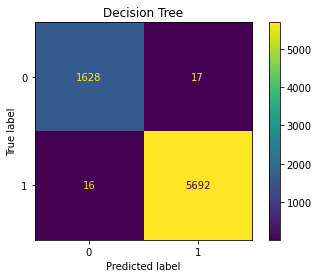

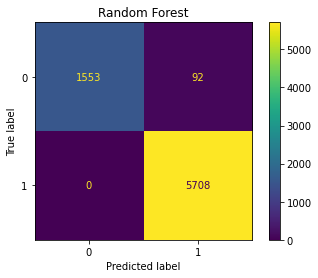

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#already made predictions: y_test_pred
#y_test is the true label
#calculate the confusion matrix, named it cm
cm_test_dtc = confusion_matrix(y_test, y_dtc_pred_test, labels=dtc_model.classes_)
cm_test_rfc = confusion_matrix(y_test, y_rfc_pred_test, labels=rfc_model.classes_)
#diplay the matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_dtc,display_labels=dtc_model.classes_)
disp1.plot()
plt.title("Decision Tree")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_rfc,display_labels=rfc_model.classes_)
disp2.plot()
plt.title("Random Forest")


Metric scores all across the board 

- Summary
- Look at most correlated columns to identify target leakage again
- Drop possible leaky columns
- Do gridsearch cv
- model

Takaways:

All scores from the evaluation metrics (Accuracy, Precision, Recall, F1_score, MCC) for both models are really really good. The Confusion Matrix for both models predicted high True Negative and True Positive as well. 

The results seem to be too good to be true. If the company decides to deploy this model to make decisions, it would not perform well which further leads to more losses for the company. 

I suspect there could still be target and data leakages present in my dataset. Thus, I will investigate further.

# <span style='color:maroon'> More preprocessing </span>

#### Only keep features known to potential investors

One way I can spot target/data leakage is through feature analysis. 

During actual use of this prediction model, not all information would be available to potential investors.

Therefore, by examning the data dictionary and some online research, for each feature, I will check the decsription in the Data Dictionary and only keep features that are available to investors before considering an investment loan.

Furthermore, my feature space is still too large and from my previous modeling, I can see a clear overfit happening in both my DTC and RFC models.(as seen in the perfect 1.0 training set score) Thus, reducing more features would hopefully help in removing the suspected data leakage as well as reduce overfitting.

In [36]:
### print current columns in my dataset
print(sorted(X.columns))

['acc_open_past_24mths', 'annual_inc', 'application_type_Individual', 'application_type_Joint App', 'avg_cur_bal', 'bc_open_to_buy', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'grade', 'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'initial_list_status_f', 'initial_list_status_w', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'installment*term', 'int_rate', 'loan_amnt', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_

In [37]:
# number of features in current dataframe
len(X.columns)

77

Finally, drop all features that I do not want to keep(potential target leakages): 

In [38]:
X.drop(['total_pymnt','total_rec_prncp','total_rec_int',
             'total_rec_late_fee','collections_12_mths_ex_med','out_prncp'
       ,'out_prncp_inv','grade'], axis=1, inplace=True)

In [39]:
X.shape

(36762, 69)

I now have 69 columns reduced from 77 previously. Hopefully through some feature reduction, I will have removed my target/data leakage.

# <span style='color:maroon'> Modeling 2nd iteration </span>

Recalling from my first iteration, my model results for both DTC and RFC were unrealistically good. Overfitting could be seen by the perfect training score in both models as well.

Through feature reduction done in the previous step by only keeping information/features that are available to an investor before considering an investment loan, I am hoping that I have removed any target/data leakage as well as reduce risk of overfitting through reducing the feature space.

#### Train_test_split data into 80% training 20% testing

In [40]:
randomstate=2004986 # for repeatability 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((29409, 69), (7353, 69), (29409,), (7353,))

In [41]:
import collections
print (collections.Counter(y_train))
print (collections.Counter(y_test))

Counter({1: 22886, 0: 6523})
Counter({1: 5708, 0: 1645})


In [42]:
print("Proportion of minority class to majority class in Training set: ", (6523/22886)*100)
print("Proportion of minority class to majority class in Testing set: ", (1645/5708)*100)

Proportion of minority class to majority class in Training set:  28.50214104692825
Proportion of minority class to majority class in Testing set:  28.819201121233355


Double checking to ensure proportion between majority and minority class is kept the same even after feature reduction which is true

#### Decision Tree Classifier after target leakage removed

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=randomstate)

dtc_model=dtc.fit(X_train, y_train)

print(dtc_model.score(X_train,y_train))
print(dtc_model.score(X_test,y_test))

1.0
0.6823065415476676


DTC model is experiencing overfit similar to 1st iteration of modeling. However, now I can see that performance of testing set has greatly decreased from 0.99 to 0.68.

#### Random Forest Classifier after target leakage removed

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=randomstate)

rfc_model=rfc.fit(X_train, y_train)

print(rfc_model.score(X_train,y_train))
print(rfc_model.score(X_test,y_test))

1.0
0.7826737386100912


In [59]:
len(X.columns)

73

Similar for RFC... RFC model is experiencing overfit similar to 1st iteration of modeling. However, now I can see that performance of testing set has also greatly decreased from 0.98 to 0.78.

Takeaways for both models:

The decrease in testing score in this 2nd iteration is great as it is a sign that possible target/data leakage has been removed. The overfit that is still being seen could possible be from the high dimensionality of my dataset. 

I can see that it contains a high number of columns of 73.

# <span style='color:maroon'> Feature Reduction </span>

After positive signs of data/target leakages being removed, it is time to address the high dimensionality that my dataset still contains. 

I will be reducing number of features through addressing multicollinearity. 

#### Multicollinearity

Although multicollinearity is not much of a problem for decision trees, these features decrease importances of each other and can make feature analysis and interpretability more difficult.

Therefore, I calculate feature correlations and remove the features that are highly correlated with each other before modeling. 

I can achieve this by calculating VIF value

I will now calculate the Variance Inflation Factor (VIF) value to address multicollinearity. Although a correlation matrix and scatter plot can be used to find multicollinearity, their findings only show the bivariate relationship between independat variables. Thus i will use VIF to show correlation of a variable with a group of other variables

I will first import the dataset saved from my first checkpoint which contained data right before one-hot encoding.

Then I will exclude the leaky columns again before calculating VIF value 

In [56]:
# loading data prior to one-hot encoding of categorical values
df_loan = pd.read_csv('C:/Users/User/Desktop/TP Y2(Sem2)/Machine Learning for Decision Making/Assignment/df_loan.csv')
df_loan.head()

,application_type,home_ownership,loan_status,loan_amnt,int_rate,installment*term,term,installment,grade,annual_inc,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,Individual,MORTGAGE,1,25000,10.91,29426.76,36,817.41,5,63000.0,...,13,18,10,17,0,2,100.0,42.9,0,0
1,Individual,RENT,1,18000,16.02,22788.36,36,633.01,4,77000.0,...,7,43,4,9,0,4,83.0,75.0,0,0
2,Individual,MORTGAGE,1,14400,10.42,16830.00,36,467.50,5,55000.0,...,4,6,2,7,0,3,100.0,0.0,1,0
3,Individual,MORTGAGE,1,15600,30.79,30738.60,60,512.31,0,70000.0,...,14,23,8,18,0,7,97.8,0.0,0,0
4,Individual,RENT,1,5000,13.59,6116.40,36,169.90,4,87000.0,...,7,8,7,8,0,2,100.0,75.0,0,2


In [57]:
# drop leaky columns
df_loan.drop(['total_pymnt','total_rec_prncp','total_rec_int',
             'total_rec_late_fee','collections_12_mths_ex_med','out_prncp'
       ,'out_prncp_inv','grade'], axis=1, inplace=True)
df_loan.head()

,application_type,home_ownership,loan_status,loan_amnt,int_rate,installment*term,term,installment,annual_inc,verification_status,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,Individual,MORTGAGE,1,25000,10.91,29426.76,36,817.41,63000.0,Source Verified,...,13,18,10,17,0,2,100.0,42.9,0,0
1,Individual,RENT,1,18000,16.02,22788.36,36,633.01,77000.0,Source Verified,...,7,43,4,9,0,4,83.0,75.0,0,0
2,Individual,MORTGAGE,1,14400,10.42,16830.00,36,467.50,55000.0,Source Verified,...,4,6,2,7,0,3,100.0,0.0,1,0
3,Individual,MORTGAGE,1,15600,30.79,30738.60,60,512.31,70000.0,Not Verified,...,14,23,8,18,0,7,97.8,0.0,0,0
4,Individual,RENT,1,5000,13.59,6116.40,36,169.90,87000.0,Not Verified,...,7,8,7,8,0,2,100.0,75.0,0,2


In [58]:
# split data into X(predictors) and y(target)
X = df_loan.drop('loan_status',axis=1)
y = df_loan['loan_status']

I will now calculate VIF values for my training set and analyze columns that have high multicollinearity 

In [13]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# exclude the target variable 
X = df_loan.drop('loan_status', axis=1)
# select only the numerical data type columns by excluding all object type
num_feat = X.select_dtypes(exclude='object')

# create a function to easily calculate VIF value
def calc_vif(num_feat):

    # initialise vif variable as a dataframe
    vif = pd.DataFrame()
    # create new column called 'VIF' and store calculated VIF score into the column
    vif["VIF"] = [variance_inflation_factor(num_feat.values, i) for i in range(num_feat.shape[1])]
    # create new column called 'Column' and store each name column as a row
    vif["Column"] = num_feat.columns

    return(vif)

calc_vif(num_feat)



,VIF,Column
0,303.593170,loan_amnt
1,29.031556,int_rate
2,146.240291,installment*term
3,93.861527,term
4,140.358495,installment
5,1.965197,annual_inc
6,3.451204,dti
7,2.506649,delinq_2yrs
8,2.491021,inq_fi
9,3.771676,inq_last_12m


Takeaway:

I can see that most of my features have high VIF values indicating that these columns are highly correlated with other columns.

A good VIF value is close to 1. As I do not want to lose too many columns that may render my model useless in the future, thus I will set a cutoff VIF value of <5.

As VIF values change after each removal of a column, I will drop column starting with the largest VIF value first as its trend is highly captured by other variables. Then iteratively repeat the process and check to see the next column with highest VIF value.

In [14]:
# dropping highest VIF value column - 'open_acc'
num_feat = num_feat.drop(['open_acc'],axis=1)
calc_vif(num_feat)


,VIF,Column
0,303.593031,loan_amnt
1,29.031340,int_rate
2,146.237081,installment*term
3,93.859691,term
4,140.356315,installment
5,1.965149,annual_inc
6,3.450919,dti
7,2.505133,delinq_2yrs
8,2.490758,inq_fi
9,3.771666,inq_last_12m


In [15]:
# dropping highest VIF value column - 'total_acc'
num_feat = num_feat.drop(['total_acc'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,303.578467,loan_amnt
1,29.025825,int_rate
2,146.226821,installment*term
3,93.859673,term
4,140.355498,installment
5,1.960241,annual_inc
6,3.449314,dti
7,2.504217,delinq_2yrs
8,2.489521,inq_fi
9,3.771622,inq_last_12m


In [16]:
# dropping highest VIF value column - 'loan_amnt'
num_feat = num_feat.drop(['loan_amnt'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,12.586110,int_rate
1,74.456571,installment*term
2,78.343564,term
3,63.833233,installment
4,1.957653,annual_inc
5,3.449071,dti
6,2.503569,delinq_2yrs
7,2.489086,inq_fi
8,3.771002,inq_last_12m
9,2.200503,inq_last_6mths


In [17]:
# dropping highest VIF value column - 'acc_open_past_24mths'
num_feat = num_feat.drop(['acc_open_past_24mths'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,12.585739,int_rate
1,74.446505,installment*term
2,78.341610,term
3,63.828317,installment
4,1.957246,annual_inc
5,3.448295,dti
6,2.500746,delinq_2yrs
7,2.479294,inq_fi
8,3.765434,inq_last_12m
9,2.200460,inq_last_6mths


In [18]:
# dropping highest VIF value column - 'num_rev_tl_bal_gt_0'
num_feat = num_feat.drop(['num_rev_tl_bal_gt_0'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,12.525487,int_rate
1,74.441386,installment*term
2,78.256438,term
3,63.819431,installment
4,1.956973,annual_inc
5,3.445696,dti
6,2.500231,delinq_2yrs
7,2.472967,inq_fi
8,3.764491,inq_last_12m
9,2.171537,inq_last_6mths


In [19]:
# dropping highest VIF value column - 'term'
num_feat = num_feat.drop(['term'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,12.070864,int_rate
1,20.299497,installment*term
2,20.551481,installment
3,1.956128,annual_inc
4,3.444692,dti
5,2.402370,delinq_2yrs
6,2.472821,inq_fi
7,3.764406,inq_last_12m
8,2.170789,inq_last_6mths
9,2.646610,mort_acc


In [20]:
# dropping highest VIF value column - 'num_tl_op_past_12m'
num_feat = num_feat.drop(['num_tl_op_past_12m'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,12.070741,int_rate
1,20.299496,installment*term
2,20.551066,installment
3,1.955145,annual_inc
4,3.441251,dti
5,2.398296,delinq_2yrs
6,2.472064,inq_fi
7,3.650431,inq_last_12m
8,2.144448,inq_last_6mths
9,2.568301,mort_acc


In [21]:
# dropping highest VIF value column - 'num_op_rev_tl'
num_feat = num_feat.drop(['num_op_rev_tl'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,12.066883,int_rate
1,20.299477,installment*term
2,20.550986,installment
3,1.954429,annual_inc
4,3.439919,dti
5,2.398248,delinq_2yrs
6,2.462496,inq_fi
7,3.648076,inq_last_12m
8,2.132321,inq_last_6mths
9,2.564742,mort_acc


In [22]:
# dropping highest VIF value column - 'pub_rec'
num_feat = num_feat.drop(['pub_rec'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,12.065163,int_rate
1,20.297004,installment*term
2,20.549782,installment
3,1.954428,annual_inc
4,3.439911,dti
5,2.397913,delinq_2yrs
6,2.462275,inq_fi
7,3.648022,inq_last_12m
8,2.132296,inq_last_6mths
9,2.564531,mort_acc


In [23]:
# dropping highest VIF value column - 'num_bc_tl'
num_feat = num_feat.drop(['num_bc_tl'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,12.059486,int_rate
1,20.290395,installment*term
2,20.545256,installment
3,1.954056,annual_inc
4,3.439843,dti
5,2.397906,delinq_2yrs
6,2.460440,inq_fi
7,3.647260,inq_last_12m
8,2.132262,inq_last_6mths
9,2.564515,mort_acc


In [24]:
# dropping highest VIF value column - 'num_actv_bc_tl'
num_feat = num_feat.drop(['num_actv_bc_tl'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,12.041373,int_rate
1,20.262104,installment*term
2,20.518652,installment
3,1.953953,annual_inc
4,3.439727,dti
5,2.397819,delinq_2yrs
6,2.457788,inq_fi
7,3.647229,inq_last_12m
8,2.127444,inq_last_6mths
9,2.564432,mort_acc


In [25]:
# dropping highest VIF value column - 'pct_tl_nvr_dlq'
num_feat = num_feat.drop(['pct_tl_nvr_dlq'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,9.554139,int_rate
1,19.402357,installment*term
2,19.770578,installment
3,1.949383,annual_inc
4,3.345879,dti
5,2.325170,delinq_2yrs
6,2.457554,inq_fi
7,3.639726,inq_last_12m
8,2.123172,inq_last_6mths
9,2.560951,mort_acc


In [26]:
# dropping highest VIF value column - 'installment'
num_feat = num_feat.drop(['installment'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,9.254505,int_rate
1,4.319445,installment*term
2,1.942678,annual_inc
3,3.338193,dti
4,2.322044,delinq_2yrs
5,2.457075,inq_fi
6,3.638344,inq_last_12m
7,2.123001,inq_last_6mths
8,2.553517,mort_acc
9,3.918007,open_acc_6m


In [27]:
# dropping highest VIF value column - 'num_sats'
num_feat = num_feat.drop(['num_sats'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,9.248257,int_rate
1,4.319425,installment*term
2,1.940820,annual_inc
3,3.301370,dti
4,2.320899,delinq_2yrs
5,2.456475,inq_fi
6,3.635956,inq_last_12m
7,2.118363,inq_last_6mths
8,2.547977,mort_acc
9,3.916242,open_acc_6m


In [28]:
# dropping highest VIF value column - 'num_bc_sats'
num_feat = num_feat.drop(['num_bc_sats'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,9.224166,int_rate
1,4.308670,installment*term
2,1.940288,annual_inc
3,3.300781,dti
4,2.319206,delinq_2yrs
5,2.456404,inq_fi
6,3.635864,inq_last_12m
7,2.114312,inq_last_6mths
8,2.542699,mort_acc
9,3.915669,open_acc_6m


In [29]:
# dropping highest VIF value column - 'int_rate'
num_feat = num_feat.drop(['int_rate'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,3.525082,installment*term
1,1.938507,annual_inc
2,3.184604,dti
3,2.296305,delinq_2yrs
4,2.441481,inq_fi
5,3.623202,inq_last_12m
6,2.098449,inq_last_6mths
7,2.512661,mort_acc
8,3.890898,open_acc_6m
9,2.742910,mths_since_recent_bc


In [30]:
# dropping highest VIF value column - 'num_rev_accts'
num_feat = num_feat.drop(['num_rev_accts'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,3.523753,installment*term
1,1.938498,annual_inc
2,3.181219,dti
3,2.273416,delinq_2yrs
4,2.441324,inq_fi
5,3.620939,inq_last_12m
6,2.098389,inq_last_6mths
7,2.458522,mort_acc
8,3.890852,open_acc_6m
9,2.741699,mths_since_recent_bc


In [31]:
# dropping highest VIF value column - 'mo_sin_old_il_acct'
num_feat = num_feat.drop(['mo_sin_old_il_acct'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,3.508874,installment*term
1,1.935297,annual_inc
2,3.147977,dti
3,2.270629,delinq_2yrs
4,2.441274,inq_fi
5,3.620782,inq_last_12m
6,2.098095,inq_last_6mths
7,2.450846,mort_acc
8,3.888289,open_acc_6m
9,2.738171,mths_since_recent_bc


In [32]:
# dropping highest VIF value column - 'open_rv_24m'
num_feat = num_feat.drop(['open_rv_24m'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,3.507087,installment*term
1,1.935286,annual_inc
2,3.147353,dti
3,2.269091,delinq_2yrs
4,2.435836,inq_fi
5,3.613474,inq_last_12m
6,2.095913,inq_last_6mths
7,2.448340,mort_acc
8,3.887570,open_acc_6m
9,2.730218,mths_since_recent_bc


In [33]:
# dropping highest VIF value column - 'open_il_24m'
num_feat = num_feat.drop(['open_il_24m'],axis=1)
calc_vif(num_feat)

,VIF,Column
0,3.501647,installment*term
1,1.929178,annual_inc
2,3.108430,dti
3,2.267269,delinq_2yrs
4,2.265798,inq_fi
5,3.557248,inq_last_12m
6,2.093464,inq_last_6mths
7,2.446765,mort_acc
8,3.887437,open_acc_6m
9,2.729391,mths_since_recent_bc


In [34]:
# dropping highest VIF value column - 'mo_sin_old_rev_tl_op'
num_feat = num_feat.drop(['mo_sin_old_rev_tl_op'],axis=1)
calc_vif(num_feat)


,VIF,Column
0,3.491462,installment*term
1,1.921918,annual_inc
2,3.080251,dti
3,2.248758,delinq_2yrs
4,2.265744,inq_fi
5,3.554228,inq_last_12m
6,2.092649,inq_last_6mths
7,2.348809,mort_acc
8,3.883196,open_acc_6m
9,2.679142,mths_since_recent_bc


Finally, there are no more columns that have VIF values of more than 5. In total, I can drop the 21 columns i have iteratively identified and dropped in num_feat.

In [59]:
# dropping 19 high VIF value columns 
X.drop(['open_acc','total_acc','loan_amnt','acc_open_past_24mths','num_rev_tl_bal_gt_0','term',
       'num_tl_op_past_12m','num_op_rev_tl','pub_rec','num_bc_tl','num_actv_bc_tl','pct_tl_nvr_dlq',
        'installment','num_sats','num_bc_sats','int_rate',
       'num_rev_accts','mo_sin_old_il_acct','open_rv_24m','open_il_24m','mo_sin_old_rev_tl_op'], axis=1,inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36762 entries, 0 to 36761
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   application_type          36762 non-null  object 
 1   home_ownership            36762 non-null  object 
 2   installment*term          36762 non-null  float64
 3   annual_inc                36762 non-null  float64
 4   verification_status       36762 non-null  object 
 5   purpose                   36762 non-null  object 
 6   dti                       36762 non-null  float64
 7   delinq_2yrs               36762 non-null  int64  
 8   inq_fi                    36762 non-null  float64
 9   inq_last_12m              36762 non-null  float64
 10  inq_last_6mths            36762 non-null  int64  
 11  mort_acc                  36762 non-null  int64  
 12  open_acc_6m               36762 non-null  float64
 13  initial_list_status       36762 non-null  object 
 14  mths_s

There are still categorical features in my dataset which i will one-hot encode using get_dummies

In [60]:
X = pd.get_dummies(X)

X.shape

(36762, 48)

In [60]:
randomstate=2004986 # for repeatability 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((29409, 48), (7353, 48), (29409,), (7353,))

#### Decision Tree Classifier after <span style='color:maroon'> multicollinearity features</span> and target leakages removed

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=randomstate)

dtc_model=dtc.fit(X_train, y_train)

print(dtc_model.score(X_train,y_train))
print(dtc_model.score(X_test,y_test))


1.0
0.677546579627363


Decision Tree Classifier model before feature reduction:

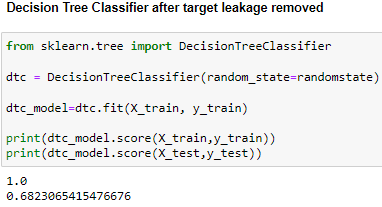

#### Random Forest Classifier after <span style='color:maroon'> multicollinearity features</span> and target leakages removed

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=randomstate)

rfc_model=rfc.fit(X_train, y_train)

print(rfc_model.score(X_train,y_train))
print(rfc_model.score(X_test,y_test))

1.0
0.7764177886576907


Random Forest Classifier model before feature reduction:

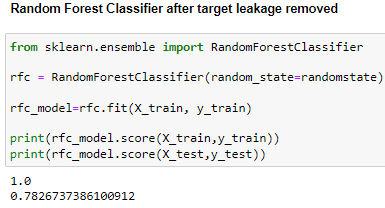

Takeaway:

After further feature reduction through calculating high VIF value features and removing them from my dataset, I can see that:

- Performance for both DTC and RFC models actually reduce slightly after further feature reduction of high multicollinearity features
- This could be due to the loss of information after removing some features. However, the slight dip in performance is totally acceptable for the trade off of lesser feature space for more interpretability, easier feature analysis and faster computation when training and modeling.
- Overfit can still be seen in model DTC and RFC models. I will try to address this through pruning of trees by hyperparameter tuning

# <span style='color:maroon'> Feature Selection/Analysis </span>

Before I find out the best parameters for my modeling with them, I first will analyse the current features that I have to see which are the most relevant in predicting my target variable. Through feature selection/analysis, I hope to remove irrelavant, redundant features. By doing so, I hope to gain higher learning accuracy, lower computational cost and better model interpretability.

The 2 methods that I will use for feature selection is:

###### CART Regression feature importance(using .feature_importances_ that the model provides)<br>

Pros:
Fast

Cons:
- Biased approach, as it has a tendency to inflate the importance of continous features or high-cardinality categorical variables
- Computed on training set statistics and therefore do not reflect the abilit to be useful to make sure predictions that generalize to the test set.

###### Permutation feature importance for regression

I will be doing permutation importance on the **testing dataset**. Reason being that I am working with a large dataset, and to avoid long computational time due to the big O notation nature of permuation if I were to perform it on the training set.. 

Pros:
- Applicable to any model
- Reasonably efficient
- Reliable technique
- No need to retrain the model at each modification of the dataset

Cons:
- More computationally expensive
- Overestimates the importance of correlated predictors. However, I have reduced the risk of this con as I have removed columns containing high multicollinearity.

#### DTC and RFC feature importance

5 most important features: [0, 15, 17, 16, 2]
Feature: 0, Score: 0.10173
Feature: 1, Score: 0.06493
Feature: 2, Score: 0.07080
Feature: 3, Score: 0.01438
Feature: 4, Score: 0.02009
Feature: 5, Score: 0.03084
Feature: 6, Score: 0.01404
Feature: 7, Score: 0.02564
Feature: 8, Score: 0.01089
Feature: 9, Score: 0.04791
Feature: 10, Score: 0.04915
Feature: 11, Score: 0.03422
Feature: 12, Score: 0.03255
Feature: 13, Score: 0.00952
Feature: 14, Score: 0.02101
Feature: 15, Score: 0.07712
Feature: 16, Score: 0.07408
Feature: 17, Score: 0.07695
Feature: 18, Score: 0.00153
Feature: 19, Score: 0.01521
Feature: 20, Score: 0.04233
Feature: 21, Score: 0.04280
Feature: 22, Score: 0.00397
Feature: 23, Score: 0.03100
Feature: 24, Score: 0.00619
Feature: 25, Score: 0.00291
Feature: 26, Score: 0.00137
Feature: 27, Score: 0.00209
Feature: 28, Score: 0.00491
Feature: 29, Score: 0.00583
Feature: 30, Score: 0.00459
Feature: 31, Score: 0.00610
Feature: 32, Score: 0.00527
Feature: 33, Score: 0.00668
Feature: 34,

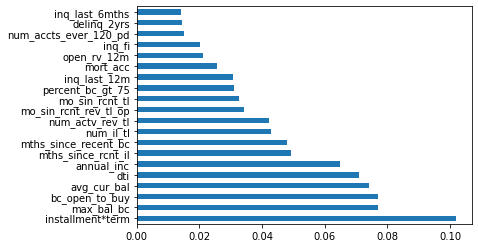

In [15]:
dtc_feat_importances = pd.Series(dtc_model.feature_importances_, index=X.columns)
dtc_feat_importances.nlargest(20).plot(kind='barh')


important_features_dict = {}
for idx, val in enumerate(dtc_model.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

# get importance
dtc_importance = dtc_model.feature_importances_
# summarize feature importance
for i,v in enumerate(dtc_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

5 most important features: [0, 17, 2, 16, 15]
Feature: 0, Score: 0.08795
Feature: 1, Score: 0.05830
Feature: 2, Score: 0.06486
Feature: 3, Score: 0.01328
Feature: 4, Score: 0.02462
Feature: 5, Score: 0.03110
Feature: 6, Score: 0.01668
Feature: 7, Score: 0.02233
Feature: 8, Score: 0.01710
Feature: 9, Score: 0.04726
Feature: 10, Score: 0.04862
Feature: 11, Score: 0.04146
Feature: 12, Score: 0.03665
Feature: 13, Score: 0.01574
Feature: 14, Score: 0.02205
Feature: 15, Score: 0.06304
Feature: 16, Score: 0.06444
Feature: 17, Score: 0.06713
Feature: 18, Score: 0.00125
Feature: 19, Score: 0.01664
Feature: 20, Score: 0.04096
Feature: 21, Score: 0.04555
Feature: 22, Score: 0.00511
Feature: 23, Score: 0.03314
Feature: 24, Score: 0.00765
Feature: 25, Score: 0.00364
Feature: 26, Score: 0.00482
Feature: 27, Score: 0.00479
Feature: 28, Score: 0.00648
Feature: 29, Score: 0.00493
Feature: 30, Score: 0.00739
Feature: 31, Score: 0.00840
Feature: 32, Score: 0.00665
Feature: 33, Score: 0.00744
Feature: 34,

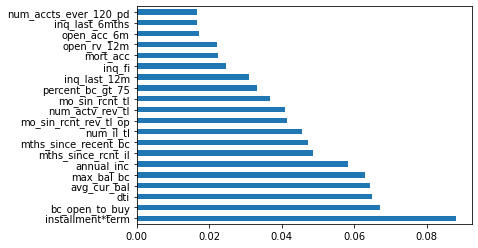

In [16]:
rfc_feat_importances = pd.Series(rfc_model.feature_importances_, index=X.columns)
rfc_feat_importances.nlargest(20).plot(kind='barh')


important_features_dict = {}
for idx, val in enumerate(rfc_model.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

# get importance
rfc_importance = rfc_model.feature_importances_
# summarize feature importance
for i,v in enumerate(rfc_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Takeaway:

- I can see that the feature with the most predictive power is "installment*term" for both DTC and RFC models
- Differences between each feature importance is small 

To further reduce the number of features in my column, I will remove features that have values less than 0.01.

#### Feature selection using Random Forest Importance 

I will be using SelectFromModel class to define both the model I wish to calculate importance scores, RandomForestClassifier in this case. 

I have decided that the optimum number of features to keep was **12** as it gave me the highest performance score. Increasing max_features to anymore than 12 would decrease performance or stay stagnant. And decreasing max_features would decrease performance.

In [46]:
#Want to find out how many trees were used in the previous Randfom Forest Classifier
count=0
for t in rfc_model.estimators_:
    count+=1
    #print("Tree depths: ",t.get_depth()) #print out the depth for each tree
print("No. of trees in this forest: ", count)

No. of trees in this forest:  100


100 trees were used in my previous RFC modeling

#### Feature selection for DTC model

In [60]:
# from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
 
# creating a feature selection function. 
# takes in both training X and y, and only testing X
def select_features(X_train, y_train, X_test):
# configure to select a subset of features. 
# SelectFromModel will select those features which importance is greater than the mean importance of all the features by default
    fs = SelectFromModel(DecisionTreeClassifier(), max_features=12)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
dtc_model.fit(X_train_fs, y_train)
# evaluate the model
yhat = dtc_model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 67.05


In [61]:
# To see which features are important we can use get_support method on the fitted model
# return an array of boolean values. 
# True for the features whose importance is greater than the mean importance and False for the rest.
fs.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [62]:
# make a list and count the selected features.
# will return an Integer representing the number of features selected by the random forest.
selected_feat= X_train.columns[(fs.get_support())]
len(selected_feat)
# return the name of the selected features.
print(selected_feat)

Index(['installment*term', 'annual_inc', 'dti', 'mths_since_recent_bc',
       'mths_since_rcnt_il', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'max_bal_bc', 'avg_cur_bal', 'bc_open_to_buy', 'num_actv_rev_tl',
       'num_il_tl'],
      dtype='object')


#### Feature selection for RFC model

In [53]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
rfc_model.fit(X_train_fs, y_train)
# evaluate the model
yhat = rfc_model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.60


In [47]:
# To see which features are important we can use get_support method on the fitted model
# return an array of boolean values. 
# True for the features whose importance is greater than the mean importance and False for the rest.
fs.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [44]:
# make a list and count the selected features.
# will return an Integer representing the number of features selected by the random forest.
selected_feat= X_train.columns[(fs.get_support())]
len(selected_feat)
# return the name of the selected features.
print(selected_feat)

Index(['installment*term', 'annual_inc', 'dti', 'mths_since_recent_bc',
       'mths_since_rcnt_il', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'max_bal_bc', 'avg_cur_bal', 'bc_open_to_buy', 'num_actv_rev_tl',
       'num_il_tl'],
      dtype='object')


Using Random forest feature importance, I have narrowed down the top 12 most important features in predicting my target variable. These 12 most important features are stored in a new training and testing set - > X_train_fs & X_test_fs.

The top 12 features for both DTC and RFC models are the same.

Hopefully from the reduced feature space, the risk of overfitting would also be reduced. I will perform a quick Random Forest modeling with the new feature space to see if the training set experiences an overfit.

Firstly I will ensure that I only include the top 12 features:

In [61]:
X = X[['installment*term', 'annual_inc', 'dti', 'mths_since_recent_bc',
       'mths_since_rcnt_il', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'max_bal_bc', 'avg_cur_bal', 'bc_open_to_buy', 'num_actv_rev_tl',
       'num_il_tl']]
X.head()

,installment*term,annual_inc,dti,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,max_bal_bc,avg_cur_bal,bc_open_to_buy,num_actv_rev_tl,num_il_tl
0,29426.76,63000.0,18.76,44.0,24.0,8,8,6609.0,13538.0,5395.0,10,9
1,22788.36,77000.0,23.11,7.0,15.0,7,7,1550.0,3194.0,431.0,4,4
2,16830.00,55000.0,21.25,29.0,7.0,10,7,3159.0,28930.0,23141.0,2,4
3,30738.60,70000.0,31.85,6.0,3.0,4,3,442.0,4724.0,46134.0,8,22
4,6116.40,87000.0,6.95,9.0,13.0,7,7,2852.0,1484.0,695.0,7,3


Creating checkpoint:

In [63]:
# merging X and y first
X.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)
checkpoint_data = pd.concat([X,y], axis=1)

checkpoint_data.to_csv(r'C:\Users\User\Desktop\TP Y2(Sem2)\Machine Learning for Decision Making\Assignment\checkpoint_data.csv',
                  index=False, header=True)

Train_test_split data:

In [62]:
randomstate=2004986 # for repeatability 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((29409, 12), (7353, 12), (29409,), (7353,))

After train_test_split, I can verify that my top 12 features are present in my dataset 

#### Decision Tree Classifier after <span style='color:maroon'>feature selection</span> , multicollinearity and target leakages removed 

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=randomstate)

dtc_model=dtc.fit(X_train, y_train)

print(dtc_model.score(X_train,y_train))
print(dtc_model.score(X_test,y_test))

1.0
0.6704746362029104


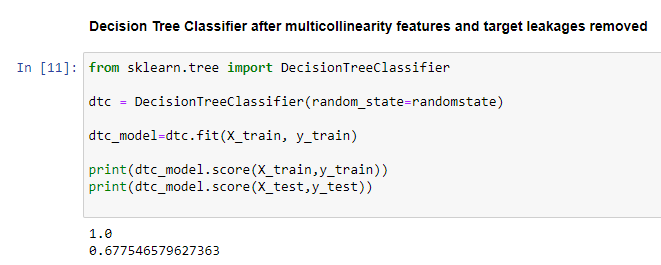

#### Random Forest Classifier after <span style='color:maroon'>feature selection</span> , multicollinearity and target leakages removed 

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=randomstate)

rfc_model=rfc.fit(X_train, y_train)

print(rfc_model.score(X_train,y_train))
print(rfc_model.score(X_test,y_test))

1.0
0.7760097919216646


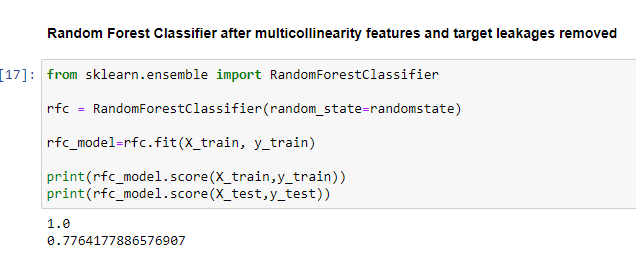

Even with the new feature space, my RFC model still experiences an overfit in the training set. Thus, reducing feature space is not suffice and I would need to dive deeper into pruning my trees.

Performance for testing set for both models only slightly dips compared to performance before feature reduction. This is still a good thing as it indicates that top 12 features selected are relevant and performance is only slightly affected by reducing feature space.

# <span style='color:maroon'> Hyperparameter Tuning </span>

I will find the best parameters for both Decision Tree and Random Forest classifier using GridSearchCV.

#### Checking parameters of unpruned models

In [12]:
dtc_model.get_depth() #find out what is the depth of DT regressor being built

35

In [13]:
#Want to find out how many trees were used in the previous RF regressor
count=0
for t in rfc_model.estimators_:
    count+=1
    #print("Tree depths: ",t.get_depth()) #print out the depth for each tree
print("No. of trees in this forest: ", count)

No. of trees in this forest:  100


In [87]:
#For each tree in the forest, what is it's depth and no. of leaves
#We can print them out in a list as follows: 
print("Tree depths: ", [t.get_depth() for t in rfc_model.estimators_])
print("Tree number of leaves: ", [t.get_n_leaves() for t in rfc_model.estimators_])

Tree depths:  [34, 31, 30, 31, 36, 30, 33, 29, 29, 34, 34, 31, 37, 30, 34, 30, 33, 42, 33, 34, 34, 29, 30, 33, 39, 30, 33, 31, 31, 29, 36, 35, 31, 33, 33, 34, 36, 44, 32, 38, 33, 31, 32, 32, 35, 31, 30, 32, 39, 31, 33, 36, 34, 33, 34, 33, 34, 31, 30, 30, 31, 35, 30, 32, 31, 31, 29, 33, 36, 31, 31, 33, 36, 32, 32, 32, 36, 29, 32, 37, 35, 34, 28, 33, 36, 31, 31, 31, 31, 34, 29, 33, 31, 34, 31, 35, 35, 35, 33, 33]
Tree number of leaves:  [4386, 4379, 4369, 4466, 4322, 4266, 4413, 4434, 4331, 4295, 4378, 4393, 4375, 4344, 4358, 4343, 4314, 4452, 4407, 4336, 4314, 4352, 4332, 4361, 4327, 4396, 4367, 4400, 4415, 4290, 4270, 4379, 4367, 4362, 4378, 4367, 4366, 4374, 4315, 4326, 4329, 4398, 4398, 4259, 4318, 4295, 4346, 4340, 4246, 4337, 4351, 4310, 4434, 4352, 4348, 4423, 4428, 4442, 4366, 4325, 4388, 4401, 4318, 4336, 4332, 4360, 4428, 4345, 4387, 4394, 4413, 4330, 4342, 4338, 4368, 4430, 4324, 4343, 4353, 4345, 4391, 4411, 4395, 4400, 4272, 4351, 4298, 4353, 4255, 4421, 4449, 4375, 4417, 44

DTC model grew to max depth of 35

RFC model max depth range was 29 to 44

#### Pruning trees by finding best parameters for our models using GridSearchCV

Starting with Decision Tree Classifier

In [88]:
#import the library to perform GridSearch-exhaustive search based on
#defined range of parameters to search for
from sklearn.model_selection import GridSearchCV

#instantiate our model
param_grid = {'max_depth': range(1, 35, 1 )} #define the search parameters
#in this case, build trees within 1 depth to 35, and see which setting gives best performance
pruned_dtc_model = GridSearchCV(DecisionTreeClassifier(random_state=randomstate), param_grid)\
.fit(X_train,y_train)

#print out the best R2 scores achieved
print(pruned_dtc_model.score(X_train,y_train))
print(pruned_dtc_model.score(X_test,y_test))

0.77819715053215
0.7762817897456821


In [89]:
print(pruned_dtc_model.best_params_) #print out the best set of parameters

{'max_depth': 4}


DT model with best parameters:

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, random_state=randomstate)

pruned_dtc_model=dtc.fit(X_train, y_train)

print(pruned_dtc_model.score(X_train,y_train))
print(pruned_dtc_model.score(X_test,y_test))

0.77819715053215
0.7762817897456821


GridSearchCV has found that with a max_depth of 4 gives the best R2 value for DTC model.

Now I will prune Random Forest Classifier and find best params

**note: took about 10mins to train for the code below**

In [15]:
#instantiate our model
#define the search parameters
#the range was drawn from prior print out of full grown RT where
#max_depth ranged between 29 to 44.
#the total number of trees in forest was 100
param_grid = {'max_depth': range(5, 45, 5 ), 'n_estimators' : range(50,150,50)} 
#in this case, build trees within 5 depth to 50 in steps of 5, and see which setting gives best performance
pruned_rfc_model = GridSearchCV(RandomForestClassifier(random_state=randomstate), param_grid)\
.fit(X_train,y_train)

#print out the best R2 scores achieved
print(pruned_rfc_model.score(X_train,y_train))
print(pruned_rfc_model.score(X_test,y_test))

NameError: name 'GridSearchCV' is not defined

In [91]:
print(pruned_rfc_model.best_params_) #print out the best parameters

{'max_depth': 10, 'n_estimators': 50}


GridSearchCV has found that with max_depth of 10 and n_estimators of 150 gives the best R2 value for RFC model.

RFC model with best parameters:

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=randomstate)

pruned_rfc_model=rfc.fit(X_train, y_train)

print(pruned_rfc_model.score(X_train,y_train))
print(pruned_rfc_model.score(X_test,y_test))

0.7999591961644394
0.77859377124983


#### Comparing R2 score between unpruned and pruned models

In [100]:
# printing out unpruned and pruned scores of both models
print("Unpruned DTC")
print(dtc_model.score(X_train,y_train))
print(dtc_model.score(X_test,y_test))
print()
print("Pruned DTC")
print(pruned_dtc_model.score(X_train,y_train))
print(pruned_dtc_model.score(X_test,y_test))
print()
print("Unpruned RFC")
print(rfc_model.score(X_train,y_train))
print(rfc_model.score(X_test,y_test))
print()
print("Pruned RFC")
print(pruned_rfc_model.score(X_train,y_train))
print(pruned_rfc_model.score(X_test,y_test))

Unpruned DTC
1.0
0.6704746362029104

Pruned DTC
0.77819715053215
0.7762817897456821

Unpruned RFC
1.0
0.7760097919216646

Pruned RFC
0.7999591961644394
0.77859377124983


- Generally pruning has helped to decrease overfit and improve both my models. 
- This can be seen by the realistic training set performance from both pruned models and also an increase in performance in both testing set for both models as well.
- Pruning the DTC model had the highest positive impact on performance as accuracy score rose 10% from 0.67 to 0.77. 
- Despite deducing my features to only the top 12, there is no indication of underfitting as the performance for training and testing are similar but decent and not too poor.

#### Calculate Evaluation metrics for DT pruned model

The metrics are:
- Accuracy Score
- Precision 
- Recall
- F1_score
- MCC (Mathews Correlation Coefficient)

In [34]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, matthews_corrcoef
# make predictions from the DTC test set
y2_dtc_pred_test = pruned_dtc_model.predict(X_test)
# make predictions from the RFC test set
y2_rfc_pred_test = pruned_rfc_model.predict(X_test)
print("Evaluation metric for DTC test:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y2_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y2_dtc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y2_dtc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y2_dtc_pred_test)))
print()
print("Evaluation metric for RFC test:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y2_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y2_rfc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y2_rfc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y2_rfc_pred_test)))

Evaluation metric for DTC test:
precision_score: 0.65675
accuracy_score: 0.61781
recall_score: 0.62538
matthews_corrcoef: 0.23567

Evaluation metric for RFC test:
precision_score: 0.65675
accuracy_score: 0.65575
recall_score: 0.64991
matthews_corrcoef: 0.31151


Recalling from my first model iteration, both my DTC and RFC model has really good almost unrealistic scores. All evaluation metrics calculated excellent scores which was too good to be true. 

After some feature reduction through removing high multicollinearity features, feature selection and cross validation through GridSearchCV, the model now has much more realistic scores. 

Focusing on the scores, it is a good sign that both models have high recall values. As mentioned previously, recall is prioritised in this business case as Recall is a more important metric given that we’re more concerned with false negatives(customers who charged off)

However, our MCC scores can be improved for both models. For DTC model is 0 while RFC model is 0.10. The closer the value to 0 indicates the model/models are no better than a random guess. Therefore our DTC model is is no better than a random guess and our RFC model needs to be improved.

#### Confusion Matrix

Text(0.5, 1.0, 'Random Forest')

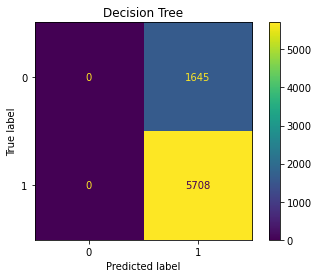

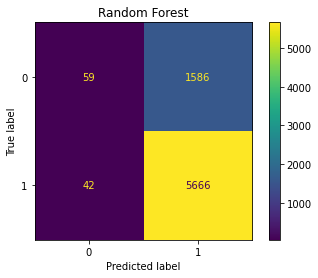

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#already made predictions: y_test_pred
#y_test is the true label
#calculate the confusion matrix, named it cm
cm2_test_dtc = confusion_matrix(y_test, y2_dtc_pred_test, labels=pruned_dtc_model.classes_)
cm2_test_rfc = confusion_matrix(y_test, y2_rfc_pred_test, labels=pruned_rfc_model.classes_)
#diplay the matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm2_test_dtc,display_labels=pruned_dtc_model.classes_)
disp1.plot()
plt.title("Decision Tree")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2_test_rfc,display_labels=pruned_rfc_model.classes_)
disp2.plot()
plt.title("Random Forest")

Results for DTC:

TP:5708<br>
FN:0<br>

**TN**:0<br>
FP:1645<br>

Results for RFC:

TP:5666<br>
FN:42<br>

**TN**:59<br>
FP:1586<br>

Conclusion:

Delving deeper, I can see that the high recall rate for both models is due to the high recall prediction of mostly "Fully Paid" customers. The actual values I should be paying attention to is the True Negative(TN).

Decision Tree model:

I can see that basically all values are predicted to be "Fully Paid" because there are only values in True Positive and False Positive. 

Random Forest model:

The model is not good in predicting the minority class because False Positive is more than True Negative. FP = 1586 (customers who are charged off but predicted to be fully paid) & TN = 59 (customers who are charged off, predicted to be charged off).

In [18]:
print (collections.Counter(y_train))
print (collections.Counter(y_test))

print("Proportion of minority class to majority class in Training set: ", (6523/22886)*100)
print("Proportion of minority class to majority class in Testing set: ", (1645/5708)*100)

Counter({1: 22886, 0: 6523})
Counter({1: 5708, 0: 1645})
Proportion of minority class to majority class in Training set:  28.50214104692825
Proportion of minority class to majority class in Testing set:  28.819201121233355


#### Calculating and plotting Precision Recall curves for both models

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

It is a measure that is useful in applied machine learning for evaluating binary classification models that have an **imbalance in the observations for each class**, which our dataset contains.

*It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.*

Decision Tree Classifier: f1=0.874 auc=0.845
Random Forest Classifer: f1=0.874 auc=0.865


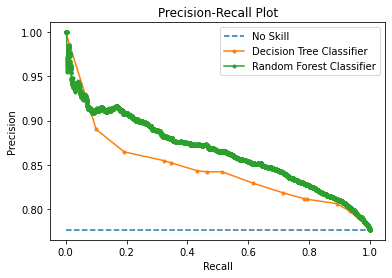

In [106]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities for DTC and RFC model
dtc_probs = pruned_dtc_model.predict_proba(X_test)
rfc_probs = pruned_rfc_model.predict_proba(X_test)

# keep probabilities for the positive outcome only for both models
dtc_probs = dtc_probs[:, 1]
rfc_probs = rfc_probs[:, 1]

# predict class values for Decision Tree Classifier
yhat = pruned_dtc_model.predict(X_test)
dtc_precision, dtc_recall, _ = precision_recall_curve(y_test, dtc_probs)
dtc_f1, dtc_auc = f1_score(y_test, yhat), auc(dtc_recall, dtc_precision)

# predict class values for Decision Tree Classifier
yhat2 = pruned_rfc_model.predict(X_test)
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, rfc_probs)
rfc_f1, rfc_auc = f1_score(y_test, yhat2), auc(rfc_recall, rfc_precision)

# summarize scores
print('Decision Tree Classifier: f1=%.3f auc=%.3f' % (dtc_f1, dtc_auc))
print('Random Forest Classifer: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(dtc_recall, dtc_precision, marker='.', label='Decision Tree Classifier')
plt.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest Classifier')


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# title
plt.title("Precision-Recall Plot")
# show the plot
plt.show()

As expected at thresholds with low recall, the precision is correspondingly high. And at very high recall, the precision begins to drop. 

The 2 classifiers have similar performance, but it looks like the Random Forest Classifier edges out Decision Tree Classifier.

Additionally, both classifiers can achieve precision score of about 0.8++ while only sacrificing minimal recall

# <span style='color:maroon'> More Preprocessing </span>

At this point, I understand that the current issue is that my models do not predict customers who charged off well(minority class). Therefore, to address this issue, I will try various methods which include:

- Undersampling
- Oversampling
- SMOTE
- SMOTE with Tomek Links (oversampling & undersampling method)

#### Random undersampling with imblearn

One way I can perform undersampling is with *RandomUnderSampler*

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Drawback is that by undersampling, I could be removing information that may be valuable. 

In [50]:
# make a copy of X and y
X2 = X.copy()
y2 = y.copy()

In [51]:
# import library
from imblearn.under_sampling import RandomUnderSampler

#random_state for repeatability
rus = RandomUnderSampler(random_state=randomstate, replacement=True)# fit predictor and target variable
x2_rus, y2_rus = rus.fit_resample(X2, y2)

print('original dataset shape:', collections.Counter(y2))
print('Resample dataset shape', collections.Counter(y2_rus))

original dataset shape: Counter({1: 28594, 0: 8168})
Resample dataset shape Counter({0: 8168, 1: 8168})


Through RandomUnderSampler, I can now see that the majority and minority class are balanced. Both classes contain equal observations of 8168. I will now perform modeling with the optimized model to see if the customers who are charged off can be predicted better:

Train_test_split new dataset:

In [52]:
randomstate=2004986 # for repeatability 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2_rus, y2_rus,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((13068, 12), (3268, 12), (13068,), (3268,))

Perform Decision Tree Classifier on resampled dataset:

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, random_state=randomstate)

pruned_dtc_model=dtc.fit(X_train, y_train)

print(pruned_dtc_model.score(X_train,y_train))
print(pruned_dtc_model.score(X_test,y_test))

0.6117232935414754
0.6178090575275398


Perform Random Forest Classifier on resampled dataset:

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=randomstate)

pruned_rfc_model=rfc.fit(X_train, y_train)

print(pruned_rfc_model.score(X_train,y_train))
print(pruned_rfc_model.score(X_test,y_test))

0.8213957759412305
0.6557527539779682


Plot Confusion matrix

Text(0.5, 1.0, 'Random Forest')

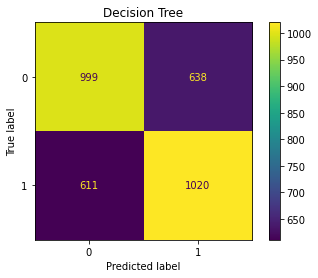

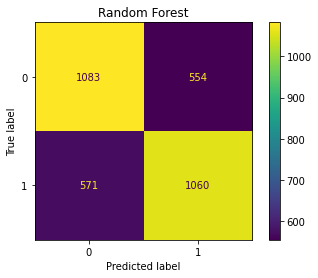

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# make predictions from the DTC test set
y3_dtc_pred_test = pruned_dtc_model.predict(X_test)
# make predictions from the RFC test set
y3_rfc_pred_test = pruned_rfc_model.predict(X_test)
#y_test is the true label
#calculate the confusion matrix, named it cm
cm3_test_dtc = confusion_matrix(y_test, y3_dtc_pred_test, labels=pruned_dtc_model.classes_)
cm3_test_rfc = confusion_matrix(y_test, y3_rfc_pred_test, labels=pruned_rfc_model.classes_)
#diplay the matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm3_test_dtc,display_labels=pruned_dtc_model.classes_)
disp1.plot()
plt.title("Decision Tree")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm3_test_rfc,display_labels=pruned_rfc_model.classes_)
disp2.plot()
plt.title("Random Forest")

Results for DTC:

TP:1020<br>
FN:611<br>

**TN**:999<br>
FP:638<br>

Results for RFC:

TP:1060<br>
FN:571<br>

**TN**:1083<br>
FN:554<br>

#### Calculate Evaluation metrics for DT pruned model

The metrics are:
- Accuracy Score
- Precision 
- Recall
- F1_score
- MCC (Mathews Correlation Coefficient)

In [49]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, matthews_corrcoef
# predictions made in cell before
print("Evaluation metric for DTC test after undersampling:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y3_dtc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y3_dtc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y3_dtc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y3_dtc_pred_test)))
print()
print("Evaluation metric for RFC test after undersampling:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y3_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y3_rfc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y3_rfc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y3_rfc_pred_test)))

Evaluation metric for DTC test after undersampling:
precision_score: 0.61520
accuracy_score: 0.61781
recall_score: 0.62538
matthews_corrcoef: 0.23567

Evaluation metric for RFC test after undersampling:
precision_score: 0.65675
accuracy_score: 0.65575
recall_score: 0.64991
matthews_corrcoef: 0.31151


Percentage of Charged off customer predicted after **undersampling**:

In [50]:
print("Percentage of Charged off customer predicted for DTC model:", (999/(999+611))*100)
print("Percentage of Charged off customer predicted for RFC model:", (1083/(1083+571))*100)

Percentage of Charged off customer predicted for DTC model: 62.049689440993795
Percentage of Charged off customer predicted for RFC model: 65.4776299879081


Classification report:

In [59]:
print("DTC model report:\n", classification_report(y_test, pruned_dtc_model.predict(X_test)))
print("RFC model report:\n", classification_report(y_test, pruned_rfc_model.predict(X_test)))

DTC model report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.62      1637
           1       0.62      0.63      0.62      1631

    accuracy                           0.62      3268
   macro avg       0.62      0.62      0.62      3268
weighted avg       0.62      0.62      0.62      3268

RFC model report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66      1637
           1       0.66      0.65      0.65      1631

    accuracy                           0.66      3268
   macro avg       0.66      0.66      0.66      3268
weighted avg       0.66      0.66      0.66      3268



Recall score for predicting charged off customers are decent for both models. DTC ->0.61 & RFC ->0.66

- Accuracy again is metric trap when it comes to predicting imbalanced datasets. I can see that although both models decrease in accuracy score, this is because the model is not always predicting majority classes due to the balanced dataset after undersampling. 
- Recall score also dropped from previous model. However this is also because in the previous model, high recall score was primarily from predicting the majority classes correctly.
- RFC model does a slightly better job in predicting charged off customers(65%) than DTC model(62%). 
- RFC model also generally has better scores overall as compared to DTC model.
- DTC model previously had MCC score of 0(no better than a random guess). However, after undersampling and balancing the datasets, MCC score increased to 0.23. Not bad but at least better than a random guess previously.

Conclusion:
In general undersampling has greatly benefitted my model in predicting charged off customers. However recalling that the downside of undersampling is that many data & information is loss due to the removing of observations from the majority class. 

The sample chosen by random under-sampling may be a biased sample. And it will not be an accurate representation of the population. 

With that being said, I feel that undersampling in this case is acceptable as after undersampling I am left with 13k rows of data which is enough for my models to be built with. I will now try other techniques to deal with imbalanced classes

#### Random oversampling with imblearn

Another way to rectify imbalance data is to generate new samples in the minority classes. This strategy generates new samples by randomly sampling with replacement of the currently available samples. The RandomOverSampler offers such a scheme.

Pros: Does not lead to information loss unlike undersampling

Cons: Increases the likelihood of overfitting since it replicates the minority class events



In [61]:
# make a copy of X and y

X3 = X.copy()
y3 = y.copy()

In [62]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=randomstate)

x3_ros, y3_ros = ros.fit_resample(X3, y3)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y3_ros))

Original dataset shape Counter({1: 28594, 0: 8168})
Resample dataset shape Counter({1: 28594, 0: 28594})


Through RandomOverSampler, I can now see that the majority and minority class are balanced. Both classes contain equal observations of 28594. The difference between undersampling is that the observations are not removed from the majority class and instead random sampled replacements increased the observations for the minority class to match majority class. 

I will now perform modeling with the optimized model to see if the customers who are charged off can be predicted better:

Train_test_split new dataset:

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x3_ros, y3_ros,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((45750, 12), (11438, 12), (45750,), (11438,))

Total observations also increased to 457050+11438 = 57,098

Perform Decision Tree Classifier on resampled dataset:

In [64]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=randomstate)

pruned_dtc_model=dtc.fit(X_train, y_train)

print(pruned_dtc_model.score(X_train,y_train))
print(pruned_dtc_model.score(X_test,y_test))

0.6029508196721312
0.5975695051582445


Perform Random Forest Classifier on resampled dataset:

In [65]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=randomstate)

pruned_rfc_model=rfc.fit(X_train, y_train)

print(pruned_rfc_model.score(X_train,y_train))
print(pruned_rfc_model.score(X_test,y_test))

0.7873661202185792
0.7261759048784753


#### Calculate Evaluation metrics for DT pruned model

The metrics are:
- Accuracy Score
- Precision 
- Recall
- F1_score
- MCC (Mathews Correlation Coefficient)

Text(0.5, 1.0, 'Random Forest')

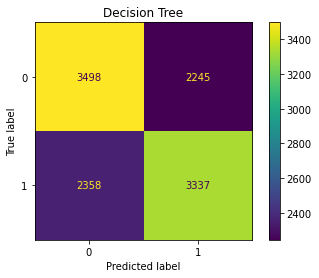

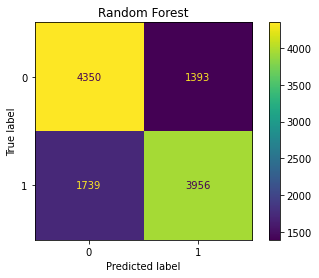

In [66]:
# make predictions from the DTC test set
y4_dtc_pred_test = pruned_dtc_model.predict(X_test)
# make predictions from the RFC test set
y4_rfc_pred_test = pruned_rfc_model.predict(X_test)
#y_test is the true label
#calculate the confusion matrix, named it cm
cm4_test_dtc = confusion_matrix(y_test, y4_dtc_pred_test, labels=pruned_dtc_model.classes_)
cm4_test_rfc = confusion_matrix(y_test, y4_rfc_pred_test, labels=pruned_rfc_model.classes_)
#diplay the matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm4_test_dtc,display_labels=pruned_dtc_model.classes_)
disp1.plot()
plt.title("Decision Tree")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm4_test_rfc,display_labels=pruned_rfc_model.classes_)
disp2.plot()
plt.title("Random Forest")

Results for DTC:

TP:3337<br>
FN:2358<br>

**TN**:3498<br>
FP:2245<br>

Results for RFC:

TP:3956<br>
FN:1739<br>

**TN**:4350<br>
FN:1393<br>

Classification report:

In [67]:
print("DTC model report:\n", classification_report(y_test, pruned_dtc_model.predict(X_test)))
print("RFC model report:\n", classification_report(y_test, pruned_rfc_model.predict(X_test)))

DTC model report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.60      5743
           1       0.60      0.59      0.59      5695

    accuracy                           0.60     11438
   macro avg       0.60      0.60      0.60     11438
weighted avg       0.60      0.60      0.60     11438

RFC model report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74      5743
           1       0.74      0.69      0.72      5695

    accuracy                           0.73     11438
   macro avg       0.73      0.73      0.73     11438
weighted avg       0.73      0.73      0.73     11438



RFC model improved greatly from oversampling as recall score in predicting charged off customers increased from 0.66 to 0.76. RFC model also contain good precision score in predicitng both classes at 0.70+.

DTC model has almost no difference when using both undersampling and oversampling methods.

Perecentage of Charged off customer predicted after **oversampling**:

In [67]:
print("Percentage of Charged off customer predicted for DTC model:", (3498/(3498+2245))*100)
print("Percentage of Charged off customer predicted for RFC model:", (4350/(4350+1393))*100)

Percentage of Charged off customer predicted for DTC model: 60.90893261361657
Percentage of Charged off customer predicted for RFC model: 75.74438446804805


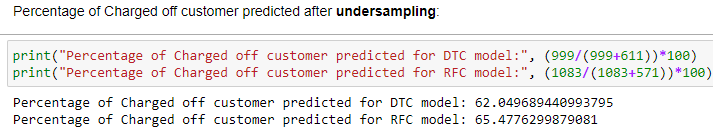

Current evaluation metrics for DTC & RFC models after **oversampling**:

In [69]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, matthews_corrcoef
# predictions made in cell before
print("Evaluation metric for DTC test after oversampling:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y4_dtc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y4_dtc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y4_dtc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y4_dtc_pred_test)))
print()
print("Evaluation metric for RFC test after oversampling:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y4_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y4_rfc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y4_rfc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y4_rfc_pred_test)))

Evaluation metric for DTC test after oversampling:
precision_score: 0.59781
accuracy_score: 0.59757
recall_score: 0.58595
matthews_corrcoef: 0.19510

Evaluation metric for RFC test after oversampling:
precision_score: 0.73958
accuracy_score: 0.72618
recall_score: 0.69464
matthews_corrcoef: 0.45303


Previous evaluation metrics for DTC & RFC models after **undersampling**:

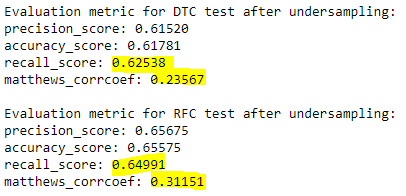

- RFC model benefits the most from oversampling while DTC model decreases abit. This can be seen in the increase in percentage of charged off customer predicted for RFC model using oversampled data as compared to undersampling. 65% in undersampled data, 75% in oversampled data.
- Recall score for RFC model improved from 0.64 to 0.69, while DTC decrease from 0.62 to 0.58.
- RFC model also generally has better scores overall as compared to DTC model.

Conclusion:
In general oversampling produced much better results than undersampling only in RFC model. It was able to predict 75% of customer who charged off which is a good improvement. Because of the balanced data, accuracy metric can be used as model is not biased in predicting more of one class than the other.

Therefore advantages of oversampling is:

- Unlike under-sampling, this method leads to no information loss.
- Outperforms under sampling(only in terms of RFC model as compared to DTC)

Disadvantages are:
- It increases the likelihood of overfitting since it replicates the minority class events. 

However, the disadvantage here is invalid as I my models did not experience an overfit as training and testing set performance were realistic, similar and not too far off.

#### Synthetic Minority Oversampling (SMOTE)

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

1. Choose a minority class as the input vector<br>
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)<br>
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor<br>
4. Repeat the steps until data is balanced<br>

What is the difference between SMOTE and Random Over Sampling?

Random oversampling just increases the size of the training data set through repetition of the original examples. It does not cause any increase in the variety of training examples.

Oversampling using SMOTE not only increases the size of the training data set, it also increases the variety.

SMOTE creates new (artificial) training examples based on the original training examples. For instance, if it sees two examples (of the same class) near each other, it creates a third artificial one, bang in the middle of the original two.

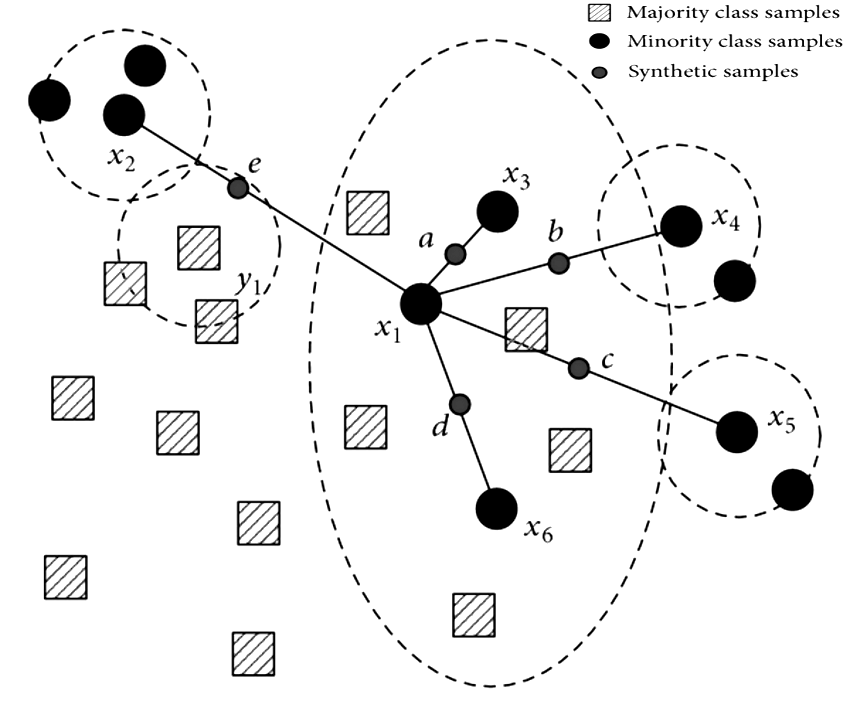

In [119]:
# import library
from imblearn.over_sampling import SMOTE

# random_state for repeatability
smote = SMOTE(random_state=randomstate)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_smote))

Original dataset shape Counter({1: 28594, 0: 8168})
Resample dataset shape Counter({1: 28594, 0: 28594})


Both classes in target variable are now balanced.

Train_test_split new dataset:

In [120]:
randomstate=2004986 # for repeatability 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((45750, 12), (11438, 12), (45750,), (11438,))

Perform Decision Tree classifier on resampled dataset:

In [121]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=randomstate)

pruned_dtc_model=dtc.fit(X_train, y_train)

print(pruned_dtc_model.score(X_train,y_train))
print(pruned_dtc_model.score(X_test,y_test))

0.6111693989071039
0.6022906102465466


Perform Random Forest classifier on resampled dataset:

In [122]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=randomstate)

pruned_rfc_model=rfc.fit(X_train, y_train)

print(pruned_rfc_model.score(X_train,y_train))
print(pruned_rfc_model.score(X_test,y_test))

0.7667540983606558
0.7011715334848749


Plot confusion matrix

Text(0.5, 1.0, 'Random Forest')

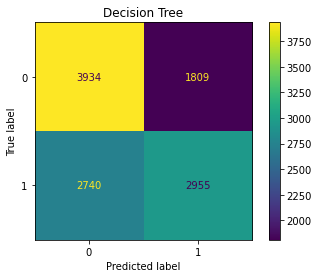

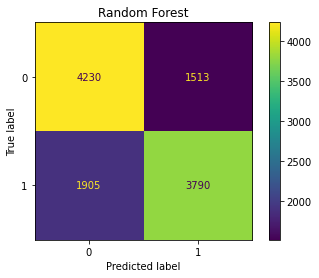

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# make predictions from the DTC test set
y5_dtc_pred_test = pruned_dtc_model.predict(X_test)
# make predictions from the RFC test set
y5_rfc_pred_test = pruned_rfc_model.predict(X_test)
#y_test is the true label
#calculate the confusion matrix, named it cm
cm5_test_dtc = confusion_matrix(y_test, y5_dtc_pred_test, labels=pruned_dtc_model.classes_)
cm5_test_rfc = confusion_matrix(y_test, y5_rfc_pred_test, labels=pruned_rfc_model.classes_)
#diplay the matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm5_test_dtc,display_labels=pruned_dtc_model.classes_)
disp1.plot()
plt.title("Decision Tree")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm5_test_rfc,display_labels=pruned_rfc_model.classes_)
disp2.plot()
plt.title("Random Forest")

Results for DTC:

TP:3215<br>
FN:2480<br>

**TN**:3722<br>
FP:2021<br>

Results for RFC:

TP:3839<br>
FN:1856<br>

**TN**:4202<br>
FN:1541<br>

Perecentage of Charged off customer predicted after using **SMOTE**:

In [126]:
print("Percentage of Charged off customer predicted for DTC model:", (3934/(3934+1809))*100)
print("Percentage of Charged off customer predicted for RFC model:", (4230/(4230+1513))*100)

Percentage of Charged off customer predicted for DTC model: 68.50078356259795
Percentage of Charged off customer predicted for RFC model: 73.65488420686053


Classification report:

In [125]:
print("DTC model report:\n", classification_report(y_test, pruned_dtc_model.predict(X_test)))
print("RFC model report:\n", classification_report(y_test, pruned_rfc_model.predict(X_test)))

DTC model report:
               precision    recall  f1-score   support

           0       0.59      0.69      0.63      5743
           1       0.62      0.52      0.57      5695

    accuracy                           0.60     11438
   macro avg       0.60      0.60      0.60     11438
weighted avg       0.60      0.60      0.60     11438

RFC model report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71      5743
           1       0.71      0.67      0.69      5695

    accuracy                           0.70     11438
   macro avg       0.70      0.70      0.70     11438
weighted avg       0.70      0.70      0.70     11438



RFC has a good recall score in predicting charged off customers at 0.74. Slightly lower than RFC model using random oversampling method(0.75). Precision score is also good but can be better at 0.69 for predicting class 0(charged off customers)

DTC model improved from previous 2 methods(undersampling & oversampling) when using SMOTE sampling method. Highest recall score amongst other DTC models in predicting charged off customers at 0.69. However, Precision score is almost 50-50 at 0.59. Can be better as we want higher confidence when predicting charged off customers. 

Current evaluation metrics for DTC & RFC models after **SMOTE**:

In [127]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, matthews_corrcoef
#predictions made in previous cells
print("Evaluation metric for DTC test set after SMOTE sampling:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y5_dtc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y5_dtc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y5_dtc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y5_dtc_pred_test)))
print()
print("Evaluation metric for RFC test set after SMOTE sampling:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y5_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y5_rfc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y5_rfc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y5_rfc_pred_test)))

Evaluation metric for DTC test set after SMOTE sampling:
precision_score: 0.62028
accuracy_score: 0.60229
recall_score: 0.51888
matthews_corrcoef: 0.20679

Evaluation metric for RFC test set after SMOTE sampling:
precision_score: 0.71469
accuracy_score: 0.70117
recall_score: 0.66550
matthews_corrcoef: 0.40311


Previous evaluation metrics for DTC & RFC models after **oversampling**:

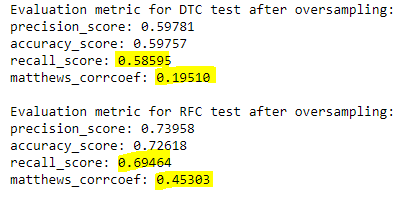

- Both models generally benefit from SMOTE sampling method as compared to using oversampling method. However, performance decreased slightly in RFC model. This can be seen in the percentage of charged off customers predicted decreasing from 75% when oversampling method applied as compared to 73% for SMOTE. 
- MCC score for DTC for SMOTE(0.20) is better as compared to MCC score using oversampling method(0.19). 
- MCC score for RFC for SMOTE(0.40) is worse as compared to MCC score using oversampling method(0.45). 
- In general oversampling still performs slightly better in all metrics as compared to SMOTE for RFC model.
- However, all metrics for DTC model performs better with SMOTE method than oversampling.

Conclusion:
Results from SMOTE and random oversampling do not have much difference. However, random oversampling has the slight edge over SMOTE after looking at both their evaluation metrics. Random oversampling has slightly higher precision and recall score in predicting both classes as compared to SMOTE. 

All in all, using SMOTE has taught me that it is possible to balance data by creating synthetic datapoints. 

#### Combining SMOTE oversampling with Tomek Links undersampling

Tomek Links is an undersampling heuristic approach that identifies all the pairs of data points that are nearest to each other but belong to different classes, and these pairs (suppose a and b) are termed as Tomek links. 

For an imbalanced dataset, first SMOTE is applied to create new synthetic minority samples to get a balanced distribution. Further, Tomek Links is used in removing the samples close to the boundary of the two classes, to increase the separation between the two classes.

In [110]:
# random state for reapeatability
smt = SMOTETomek(random_state=randomstate)

# fit predictor and target variable
X_smt, y_smt = smt.fit_resample(X, y)

print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_smote))

Original dataset shape Counter({1: 28594, 0: 8168})
Resample dataset shape Counter({1: 28594, 0: 28594})


Train_test_split new data:

In [111]:
randomstate=2004986 # for repeatability 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, #fit new resampled data
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((44396, 12), (11100, 12), (44396,), (11100,))

Perform Decision Tree Classifier with resampled dataset:

In [112]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=randomstate)

pruned_dtc_model=dtc.fit(X_train, y_train)

print(pruned_dtc_model.score(X_train,y_train))
print(pruned_dtc_model.score(X_test,y_test))

0.6125326606000541
0.612072072072072


Perform Random Forest Classifier with resampled dataset:

In [113]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=randomstate)

pruned_rfc_model=rfc.fit(X_train, y_train)

print(pruned_rfc_model.score(X_train,y_train))
print(pruned_rfc_model.score(X_test,y_test))

0.7713082259663032
0.7134234234234235


Plot confusion matrix

Text(0.5, 1.0, 'Random Forest')

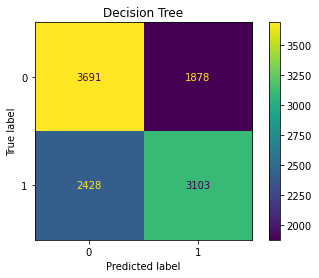

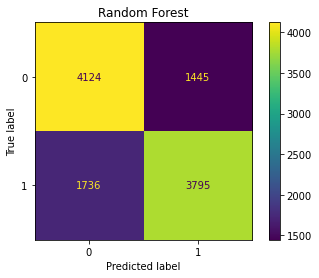

In [114]:
# make predictions from the DTC test set
y6_dtc_pred_test = pruned_dtc_model.predict(X_test)
# make predictions from the RFC test set
y6_rfc_pred_test = pruned_rfc_model.predict(X_test)
#y_test is the true label
#calculate the confusion matrix, named it cm
cm6_test_dtc = confusion_matrix(y_test, y6_dtc_pred_test, labels=pruned_dtc_model.classes_)
cm6_test_rfc = confusion_matrix(y_test, y6_rfc_pred_test, labels=pruned_rfc_model.classes_)
#diplay the matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm6_test_dtc,display_labels=pruned_dtc_model.classes_)
disp1.plot()
plt.title("Decision Tree")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm6_test_rfc,display_labels=pruned_rfc_model.classes_)
disp2.plot()
plt.title("Random Forest")

Results for DTC:

TP:3103<br>
FN:2428<br>

**TN**:3691<br>
FP:1878<br>

Results for RFC:

TP:3795<br>
FN:1736<br>

**TN**:4124<br>
FN:1445<br>

Perecentage of Charged off customer predicted after using **SMOTE with Tomek Links**:

In [115]:
print("Percentage of Charged off customer predicted for DTC model:", (3691/(3691+1878))*100)
print("Percentage of Charged off customer predicted for RFC model:", (4124/(4124+1445))*100)

Percentage of Charged off customer predicted for DTC model: 66.27760818818459
Percentage of Charged off customer predicted for RFC model: 74.0527922427725


Classification report:

In [116]:
print("DTC model report:\n", classification_report(y_test, pruned_dtc_model.predict(X_test)))
print("RFC model report:\n", classification_report(y_test, pruned_rfc_model.predict(X_test)))

DTC model report:
               precision    recall  f1-score   support

           0       0.60      0.66      0.63      5569
           1       0.62      0.56      0.59      5531

    accuracy                           0.61     11100
   macro avg       0.61      0.61      0.61     11100
weighted avg       0.61      0.61      0.61     11100

RFC model report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      5569
           1       0.72      0.69      0.70      5531

    accuracy                           0.71     11100
   macro avg       0.71      0.71      0.71     11100
weighted avg       0.71      0.71      0.71     11100



Using SMOTE with Tomek links produced similar results as to just using SMOTE which still makes RandomOverSampler method the best method so far as it has the best performance in terms of recall and precision.

Evaluation metrics for RFC and DTC test set using **SMOTE and Tomek links**:

In [117]:
#predictions made in previous cells
print("Evaluation metric for DTC test:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y6_dtc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y6_dtc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y6_dtc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y6_dtc_pred_test)))
print()
print("Evaluation metric for RFC test:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y6_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y6_rfc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y6_rfc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y6_rfc_pred_test)))

Evaluation metric for DTC test:
precision_score: 0.62297
accuracy_score: 0.61207
recall_score: 0.56102
matthews_corrcoef: 0.22498

Evaluation metric for RFC test:
precision_score: 0.72424
accuracy_score: 0.71342
recall_score: 0.68613
matthews_corrcoef: 0.42733


Previous evaluation metric for **Oversampling** method:
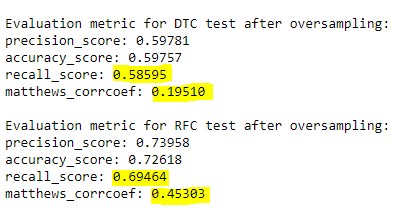

SMOTE with Tomek Links resampling method performs better for DTC model as compared to oversampling as shown by the MCC score of 0.22 to 0.19.

However, oversampling in RFC still holds the highest MCC score amongst all resampling method at 0.45. This infers that the best model and resampling method to use to predict customer charged off so far is the Random Forest Classifier with the use of RandomOverSampler method as its MCC score is the highest signalling that predicted class and the true class are moderately correlated.

# <span style='color:maroon'> Cross Validation </span>

Cross Validation helps a data scientist validate that their model is not overfitting and will generalize to unseen data, as the model score is an average across multiple validation scores, not just a single iteration. 

In this section, I will be combining the sampling methods I have conducted above, with cross validation. The ideal way to conduct this experiment would be to perform oversampling of the training set in each cross-validation iteration, not before beginning the process. This prevents the data leakage from the validation set to the training set during cross-validation, and reflects how the model trained on a balanced training set would perform when applied to an imbalanced, unseen test set.

Methods of cross validations that I will be using is:
- **Stratified K Fold**: Each fold has a unique set of train/validation, which results in the complete set of data having undergone the training process.
- **Stratified Shuffle Split**: Each fold may potentially contain the same instances of the data (some similar observations) and that some of the available data will not be used in the training process, as the random generation never selected any of them for any of the K fold train sets.

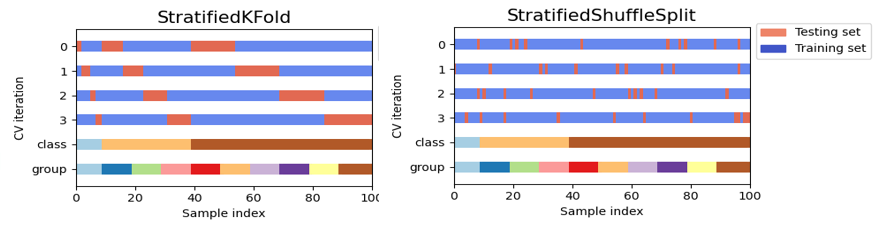

### <span style='color:maroon'> Stratified K Fold</span>

#### Defining a pipeline

The correct application of oversampling during k-fold cross-validation is to apply the method to the training dataset only, then evaluate the model on the stratified but non-transformed test set.

This can be achieved by defining a Pipeline that first transforms the training dataset with SMOTE then fits the model. 

For the sampling method, I will choose RandomOverSampler as it gave me the best scores over RandomUnderSampler, SMOTE and SMOTE with Tomek Links techniques.

Pipeline for Decision Tree Classifer:

In [136]:
# define pipeline
# This pipeline can then be evaluated using repeated k-fold cross-validation.
steps1 = [('over', RandomOverSampler(random_state=randomstate)), ('model', DecisionTreeClassifier(max_depth=4, random_state=randomstate))]
pipeline1 = Pipeline(steps=steps1)

Pipeline for Random Forest Classifier:

In [137]:
# define pipeline
# This pipeline can then be evaluated using repeated k-fold cross-validation.
steps2 = [('over', RandomOverSampler(random_state=randomstate)), ('model', RandomForestClassifier(max_depth=10, n_estimators=50, random_state=randomstate))]
pipeline2 = Pipeline(steps=steps2)

#### Evaluate pipeline using StratifiedKFold

Common values of K are k=3, k=5, and k=10, any most popular is k=10. Thus I will set n_splits to be 10.

ROC AUC value for Decision Tree Classifier with StratifiedKFold:

In [147]:
from numpy import mean
from sklearn.model_selection import StratifiedKFold
# evaluate pipeline
cv1 = StratifiedKFold(n_splits=10)
scores = cross_val_score(pipeline1, X, y, scoring='roc_auc', cv=cv1, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.633


ROC AUC value for RandomForest Classifier:

In [148]:
from numpy import mean
# evaluate pipeline
cv2 = StratifiedKFold(n_splits=10)
scores = cross_val_score(pipeline2, X, y, scoring='roc_auc', cv=cv2, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.679


Takeaway:

- DTC with StratifiedKFold cv method reports ROC AUC value of 0.633
- RFC with StratifiedKFold cv method reports ROC AUC value of 0.679

### <span style='color:maroon'> Stratified Shuffle Split</span>

#### Defining a pipeline

Pipeline for Decision Tree Classifier:


In [141]:
# define pipeline
# This pipeline can then be evaluated using repeated k-fold cross-validation.
steps3 = [('over', RandomOverSampler(random_state=randomstate)), ('model', DecisionTreeClassifier(max_depth=4, random_state=randomstate))]
pipeline3 = Pipeline(steps=steps3)

Pipeline for Random Forest Classifier:

In [142]:
# define pipeline
# This pipeline can then be evaluated using repeated k-fold cross-validation.
steps4 = [('over', RandomOverSampler(random_state=randomstate)), ('model', RandomForestClassifier(max_depth=10, n_estimators=50, random_state=randomstate))]
pipeline4 = Pipeline(steps=steps4)

#### Evaluate pipeline using StratifiedKFold

ROC AUC value for Decision Tree Classifier with StratifiedKFold:

In [150]:
from sklearn.model_selection import StratifiedKFold

# evaluate pipeline
cv3 = StratifiedKFold(n_splits=10, shuffle=True, random_state=randomstate)
scores = cross_val_score(pipeline3, X, y, scoring='roc_auc', cv=cv3, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.634


ROC AUC value for RandomForest Classifier with StratifiedKFold:

In [151]:
from sklearn.model_selection import StratifiedKFold

# evaluate pipeline
cv4 = StratifiedKFold(n_splits=10, shuffle=True, random_state=randomstate)
scores = cross_val_score(pipeline4, X, y, scoring='roc_auc', cv=cv4, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.677


Takeaway:

- DTC with Stratified Shuffle Split cv method reports ROC AUC value of 0.634
- RFC with Stratified Shuffle Split cv method reports ROC AUC value of 0.677

Conclusion:

ROC AUC is a useful tool when predicitng the probality of a binary outcome. The area under the ROC curve (AUC) results were considered excellent for AUC values between 0.9-1, good for AUC values between 0.8-0.9, fair for AUC values between 0.7-0.8, poor for AUC values between 0.6-0.7 and failed for AUC values between 0.5-0.6.

The best model with cross validation method is the Random Forest with StartifiedKFold method which has mean ROC AUC value of 0.69. This is a poor value and thus I can look to improve my model further with features engineering to increase the skill of my model in predicting more actual hit rates than false alarms.

# <span style='color:maroon'> Features Engineering </span>

In this section, I will be trying to modify features in a way that would increase the performance of my model. 

#### Baseline model(no feature engineering added)

Before performing features engineering, I will create the baseline model here again for comparison to future models that have feature engineering incorporated.

I will be performing modeling with new features primarily on RandomForest Classifier as it has been determined that the RFC model performs better than DTC in previous cells. 

To recap the baseline model consists of these settings:
- StratifiedKFold for cross validation
- Best parameters found from GridSearchCV

I would not use RandomOverSampler to balance majority & minority classes in my target column as it heavily increases the computation time taken to plot my SHAP plots.

In [304]:
# load checkpoint data
# Data that has not been resampled yet. Target leakages, multicollinearity features and feature selection done on this dataset
# aka final features that was chosen prior to any sampling methods
df_loan2 = pd.read_csv('C:/Users/User/Desktop/TP Y2(Sem2)/Machine Learning for Decision Making/Assignment/checkpoint_data.csv')

In [305]:
df_loan2

,installment*term,annual_inc,dti,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,max_bal_bc,avg_cur_bal,bc_open_to_buy,num_actv_rev_tl,num_il_tl,loan_status
0,29426.76,63000.0,18.76,44.0,24.0,8,8,6609.0,13538.0,5395.0,10,9,1
1,22788.36,77000.0,23.11,7.0,15.0,7,7,1550.0,3194.0,431.0,4,4,1
2,16830.00,55000.0,21.25,29.0,7.0,10,7,3159.0,28930.0,23141.0,2,4,1
3,30738.60,70000.0,31.85,6.0,3.0,4,3,442.0,4724.0,46134.0,8,22,1
4,6116.40,87000.0,6.95,9.0,13.0,7,7,2852.0,1484.0,695.0,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36757,33838.80,105000.0,24.75,17.0,4.0,8,4,6418.0,5830.0,7705.0,3,18,0
36758,12764.88,110000.0,17.22,24.0,2.0,24,2,8495.0,39818.0,12705.0,1,11,1
36759,16604.64,66560.0,13.18,32.0,11.0,32,11,15474.0,35799.0,6826.0,1,6,1
36760,24626.40,50200.0,23.43,4.0,10.0,2,2,4119.0,3404.0,792.0,6,16,0


In [306]:
# split data into X and y
X = df_loan2.drop('loan_status',axis=1)
y = df_loan2['loan_status']

Train_test_split resampled data:

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((29409, 12), (7353, 12), (29409,), (7353,))

Baseline RandomForest Classifier with best parameters:

In [9]:
param_grid_rfc = {'max_depth': range(5, 20, 5), 'n_estimators': range(50,150,50)}

In [10]:
#instantiate a new model based on new feature space X2
rfc_X1= GridSearchCV(RandomForestClassifier(random_state=randomstate),
                    param_grid = param_grid_rfc,
                    cv = StratifiedKFold(n_splits=5),
                    n_jobs=-1)
#build the model
rfc_X1_best=rfc_X1.fit(X_train, y_train) 

In [11]:
print(rfc_X1_best.best_params_)

{'max_depth': 10, 'n_estimators': 50}


In [12]:
# make predictions from the DTC test set
y21_rfc_pred_test=rfc_X1_best.best_estimator_.predict(X_test)


#predictions made in previous cells
print("Evaluation metric for DTC test:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y21_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y21_rfc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y21_rfc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y21_rfc_pred_test)))
print()

Evaluation metric for DTC test:
precision_score: 0.78130
accuracy_score: 0.77859
recall_score: 0.99264
matthews_corrcoef: 0.10207



I currently have a baseline score of MCC 0.1 for RFC model without RandomOverSampler

### Feature engineering round 1: binning annual_inc

Binning is a way to transform continuous variables into categorical values using pre-defined number of bins. I noticed that I have the feature annual_inc which I will try performing binning with.

According to the data dictionary annual_inc is:
- The self-reported annual income provided by the borrower during registration.

In [307]:
X['annual_inc'] = X['annual_inc'].astype('int')

I can see that there are outliers present in this column. Thus to improve the predictive power I will remove outliers present in this column first. I can use IQR score to filter out the outliers by keeping only valid values.

Firstly I will calculate Q3 and Q1 observations in annual_inc column, then calculate the IQR range for the column

In [308]:
Q1 = X["annual_inc"].quantile(0.25)
Q3 = X["annual_inc"].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 46000.0


Remove any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 which are considered outliers.

In [309]:
X["annual_inc"] = X["annual_inc"][~((X["annual_inc"] < (Q1 - 1.5 * IQR)) |(X["annual_inc"] > (Q3 + 1.5 * IQR)))]
X["annual_inc"]

0         63000.0
1         77000.0
2         55000.0
3         70000.0
4         87000.0
           ...   
36757    105000.0
36758    110000.0
36759     66560.0
36760     50200.0
36761     55000.0
Name: annual_inc, Length: 36762, dtype: float64

Bin annual_inc into 4 bins and store into new column annual_inc_rank

In [310]:
# pd.qcut to bin annual_inc into 4 bins
X['annual_inc_rank'] = pd.qcut(X['annual_inc'],4)
X['annual_inc_rank'].value_counts()

(99.999, 48000.0]      9068
(48000.0, 65000.0]     8964
(65000.0, 90000.0]     8669
(90000.0, 164000.0]    8130
Name: annual_inc_rank, dtype: int64

I can verify that the column is split into 4 bins. Low, average, above average and high income earners

Repeat again but this time create labels to encode the bins into int so that it can be passed into the model

In [311]:
# labels to encode bins
label = [0,1,2,3]
# pd.qcut to bin annual_inc into 4 bins
X['annual_inc_rank'] = pd.qcut(X['annual_inc'],4, labels=label)
X['annual_inc_rank'].value_counts()

0    9068
1    8964
2    8669
3    8130
Name: annual_inc_rank, dtype: int64

Merge X and y together first

In [312]:
# as there may be a problem with different index values between dataframes
# i will use reset_index before concatenating x and y together
X.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)
merged_data = pd.concat([X,y], axis=1)

Drop missing values that caused be creating new column

In [313]:
merged_data.dropna(inplace=True)

In [314]:
merged_data.shape

(34831, 14)

After dropping missing values caused by removing outliers in annual_inc column, I am left with 34831 observations

In [315]:
merged_data.isna().sum()

installment*term         0
annual_inc               0
dti                      0
mths_since_recent_bc     0
mths_since_rcnt_il       0
mo_sin_rcnt_rev_tl_op    0
mo_sin_rcnt_tl           0
max_bal_bc               0
avg_cur_bal              0
bc_open_to_buy           0
num_actv_rev_tl          0
num_il_tl                0
annual_inc_rank          0
loan_status              0
dtype: int64

Split data into X(predictors) and y(target) again:

In [316]:
X = merged_data.drop('loan_status', axis=1)
y = merged_data['loan_status']

In [317]:
# change column from category to int
X['annual_inc_rank'] = X['annual_inc_rank'].astype('int')

#### Train_test_split data:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((27864, 13), (6967, 13), (27864,), (6967,))

#### Build candidate model

In [24]:
param_grid_rfc = {'max_depth': range(5, 20, 5), 'n_estimators': range(50,150,50)}

In [25]:
#instantiate a new model based on new feature space X2
rfc_X1= GridSearchCV(RandomForestClassifier(random_state=randomstate),
                    param_grid = param_grid_rfc,
                    cv = StratifiedKFold(n_splits=5),
                    n_jobs=-1)
#build the model
rfc_X1_best=rfc_X1.fit(X_train, y_train) #fit in balanced data created from RandomOverSampler

In [26]:
print(rfc_X1_best.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [27]:
# make predictions from the RFC test set based on best parameters
y22_rfc_pred_test=rfc_X1_best.best_estimator_.predict(X_test)

#predictions made in previous cells
print("Evaluation metric for RFC test:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y22_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y22_rfc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y22_rfc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y22_rfc_pred_test)))
print()

Evaluation metric for RFC test:
precision_score: 0.77415
accuracy_score: 0.77178
recall_score: 0.99348
matthews_corrcoef: 0.08902



#### Visualize and explain performance using SHAP

Summary plot:

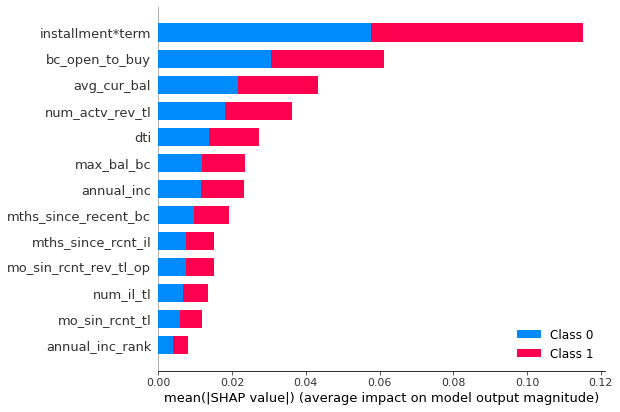

In [28]:
import shap
shap.initjs() #need this line of code to enable Javascript to see the graphs
explainer = shap.TreeExplainer(rfc_X1_best.best_estimator_) #remember to only explain the BEST model from the collection
shap_values = explainer.shap_values(X_test)
#Force plot
#for one observation/prediction, this is the 1st observation in X_test, indexed by '0'
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)

I can see that the new feature 'annual_inc_rank' contributed the least to prediction in RFC model. Thus it is not useful. 

Therefore, I can see that the annual income of a customer does not matter in predicting whether a customer would charge off and there are other circumstances instead that would be better indicators.

A customer who has high income and a customer who has low income have equal probabilities of being charged off.

### Feature Engineering round 2: DTI in relation to installment*term

Doing some research, DTI refers to the percentage of your monthly gross income that goes toward paying your debt. It compares your debt to your overall income. A lower DTI can also helps customers to get a lower mortgage interest rate. 

Thus with this understanding, I will take a look at the relationship between DTI and installment*term

In [139]:
X

,installment*term,annual_inc,dti,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,max_bal_bc,avg_cur_bal,bc_open_to_buy,num_actv_rev_tl,num_il_tl,annual_inc_rank
0,29426.76,63000.0,18.76,44.0,24.0,8,8,6609.0,13538.0,5395.0,10,9,1
1,22788.36,77000.0,23.11,7.0,15.0,7,7,1550.0,3194.0,431.0,4,4,2
2,16830.00,55000.0,21.25,29.0,7.0,10,7,3159.0,28930.0,23141.0,2,4,1
3,30738.60,70000.0,31.85,6.0,3.0,4,3,442.0,4724.0,46134.0,8,22,2
4,6116.40,87000.0,6.95,9.0,13.0,7,7,2852.0,1484.0,695.0,7,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36757,33838.80,105000.0,24.75,17.0,4.0,8,4,6418.0,5830.0,7705.0,3,18,3
36758,12764.88,110000.0,17.22,24.0,2.0,24,2,8495.0,39818.0,12705.0,1,11,3
36759,16604.64,66560.0,13.18,32.0,11.0,32,11,15474.0,35799.0,6826.0,1,6,2
36760,24626.40,50200.0,23.43,4.0,10.0,2,2,4119.0,3404.0,792.0,6,16,1


In [140]:
X.describe()

,installment*term,annual_inc,dti,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,max_bal_bc,avg_cur_bal,bc_open_to_buy,num_actv_rev_tl,num_il_tl
count,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000
mean,18425.877843,70841.185926,19.354282,23.192788,20.135196,13.399816,7.780598,5296.357124,12972.843616,12091.459103,5.303408,8.831673
std,13047.732839,31278.363300,13.817345,30.073762,24.067821,16.034448,7.664287,4630.049174,14747.601516,16284.216132,3.304212,7.497057
min,273.960000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8444.880000,48000.000000,12.310000,6.000000,7.000000,4.000000,3.000000,2173.000000,3116.000000,2132.500000,3.000000,4.000000
50%,14597.400000,65000.000000,18.260000,13.000000,13.000000,8.000000,6.000000,4166.000000,7138.000000,6277.000000,5.000000,7.000000
75%,25167.600000,90000.000000,24.920000,28.000000,23.000000,17.000000,10.000000,7000.000000,18355.000000,15549.000000,7.000000,12.000000
max,79114.200000,164000.000000,999.000000,445.000000,366.000000,292.000000,120.000000,137589.000000,218412.000000,225061.000000,36.000000,81.000000


In [318]:

#Based on the Quartile values, bin accordingly
bins = [0, 8444, 14597, 25167, 80000]
labels = [1,2,3,4]
#Create a new feature Indus_binned
X['installment*term_b'] = pd.cut(X['installment*term'], bins=bins, labels=labels).astype('float')

In [319]:
X['installment*term_b'].value_counts()

3.0    8749
4.0    8719
1.0    8704
2.0    8659
Name: installment*term_b, dtype: int64

In [287]:
X

,installment*term,annual_inc,dti,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,max_bal_bc,avg_cur_bal,bc_open_to_buy,num_actv_rev_tl,num_il_tl,annual_inc_rank,installment*term_b
0,29426.76,63000.0,18.76,44.0,24.0,8,8,6609.0,13538.0,5395.0,10,9,1,4.0
1,22788.36,77000.0,23.11,7.0,15.0,7,7,1550.0,3194.0,431.0,4,4,2,3.0
2,16830.00,55000.0,21.25,29.0,7.0,10,7,3159.0,28930.0,23141.0,2,4,1,3.0
3,30738.60,70000.0,31.85,6.0,3.0,4,3,442.0,4724.0,46134.0,8,22,2,4.0
4,6116.40,87000.0,6.95,9.0,13.0,7,7,2852.0,1484.0,695.0,7,3,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36757,33838.80,105000.0,24.75,17.0,4.0,8,4,6418.0,5830.0,7705.0,3,18,3,4.0
36758,12764.88,110000.0,17.22,24.0,2.0,24,2,8495.0,39818.0,12705.0,1,11,3,2.0
36759,16604.64,66560.0,13.18,32.0,11.0,32,11,15474.0,35799.0,6826.0,1,6,2,3.0
36760,24626.40,50200.0,23.43,4.0,10.0,2,2,4119.0,3404.0,792.0,6,16,1,3.0


New column added -> installment*term_b (binned loan amount)

In [320]:
#Suspect that installment*term is related to annual income of applicant
df1=X.groupby(
    ['installment*term_b']).agg(
{
    'dti':["mean", sum, min, "count"]
    }
)
df1

dti                      
                         mean        sum  min count
installment*term_b                                 
1.0                 17.755713  154545.73  0.0  8704
2.0                 18.495782  160154.98  0.0  8659
3.0                 19.635681  171792.57  0.0  8749
4.0                 21.520323  187635.70  0.0  8719

The lower the installment*term, the lower the average dti(debt to income ratio) of the applicant which backs up the initial hypothesis of lower DTI a customer has, a lower mortgate interest rate.

In [321]:
#Want to create two features annual_inc mean and annual_inc deviation
#for each category of installment*term_b, use the mean dti, and deviation from raw as the values
# creating new features -> dti deviation and dti mean
X2_1 = X.loc[X["installment*term_b"] == 1].assign(dti_M = 17.75)
X2_1["dti_D"] = X2_1["dti"] - X2_1["dti_M"]

X2_2 = X.loc[X["installment*term_b"] == 2].assign(dti_M = 18.49)
X2_2["dti_D"] = X2_2["dti"] - X2_2["dti_M"]

X2_3 = X.loc[X["installment*term_b"] == 3].assign(dti_M = 19.63)
X2_3["dti_D"] = X2_3["dti"] - X2_3["dti_M"]

X2_4 = X.loc[X["installment*term_b"] == 4].assign(dti_M = 21.52)
X2_4["dti_D"] = X2_4["dti"] - X2_4["dti_M"]

In [322]:
X = pd.concat([X2_1,X2_2,X2_3,X2_4], axis=0) #join the sub dfs back to the original feature space
X.head()

,installment*term,annual_inc,dti,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,max_bal_bc,avg_cur_bal,bc_open_to_buy,num_actv_rev_tl,num_il_tl,annual_inc_rank,installment*term_b,dti_M,dti_D
4,6116.40,87000.0,6.95,9.0,13.0,7,7,2852.0,1484.0,695.0,7,3,2,1.0,17.75,-10.80
11,4147.92,34000.0,24.60,10.0,23.0,6,6,1868.0,3728.0,8325.0,5,6,0,1.0,17.75,6.85
13,7062.48,45000.0,13.63,4.0,11.0,4,4,1641.0,3472.0,3992.0,5,13,0,1.0,17.75,-4.12
16,3914.64,24000.0,24.90,57.0,15.0,15,15,5260.0,2133.0,357.0,4,1,0,1.0,17.75,7.15
27,5686.20,35000.0,14.61,2.0,20.0,2,2,4253.0,1325.0,3548.0,2,2,0,1.0,17.75,-3.14


In [323]:
X.shape

(34831, 16)

In [239]:
y.shape

(34831,)

Added in 3 new features in total which are:
- installment*term_b
- dti_M
- dti_D

Train-test_split:

In [149]:
#X2 feature space now contains 3 new features
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((27864, 16), (6967, 16), (27864,), (6967,))

#### Build candidate model

In [150]:
param_grid_rfc = {'max_depth': range(5, 20, 5), 'n_estimators': range(50,150,50)}

In [151]:
#instantiate a new model based on new feature space X2
rfc_X1= GridSearchCV(RandomForestClassifier(random_state=randomstate),
                    param_grid = param_grid_rfc,
                    cv = StratifiedKFold(n_splits=5),
                    n_jobs=-1)

#build the model
rfc_X2_best=rfc_X1.fit(X_train2, y_train2) #fit in balanced data created from RandomOverSampler

In [154]:
print(rfc_X2_best.best_params_)

{'max_depth': 10, 'n_estimators': 50}


In [ ]:
# make predictions from the RFC test set based on best parameters
y23_rfc_pred_test=rfc_X2_best.best_estimator_.predict(X_test)

#predictions made in previous cells
print("Evaluation metric for RFC test:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y23_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y23_rfc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y23_rfc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y23_rfc_pred_test)))
print()

#### Evaluate newly engineered features

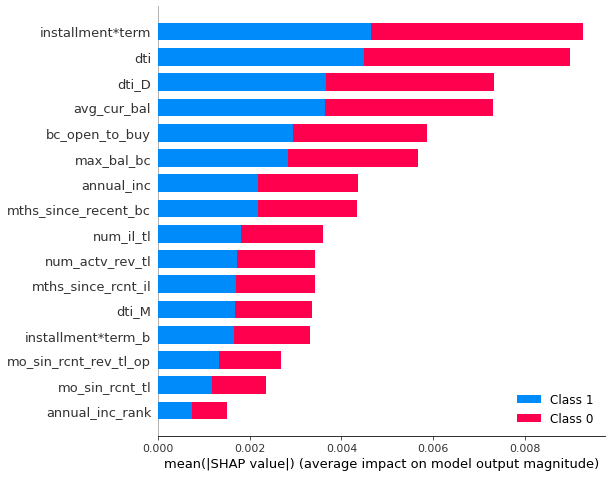

In [156]:
import shap
shap.initjs() #need this line of code to enable Javascript to see the graphs
explainer2 = shap.TreeExplainer(rfc_X2_best.best_estimator_) #remember to only explain the BEST model from the collection
shap_values2 = explainer2.shap_values(X_test2)
#Force plot
#for one observation/prediction, this is the 1st observation in X_test, indexed by '0'
shap.summary_plot(shap_values2, features=X_test2, feature_names=X_test2.columns)

In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34831 entries, 4 to 36757
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   installment*term       34831 non-null  float64 
 1   annual_inc             34831 non-null  float64 
 2   dti                    34831 non-null  float64 
 3   mths_since_recent_bc   34831 non-null  float64 
 4   mths_since_rcnt_il     34831 non-null  float64 
 5   mo_sin_rcnt_rev_tl_op  34831 non-null  int64   
 6   mo_sin_rcnt_tl         34831 non-null  int64   
 7   max_bal_bc             34831 non-null  float64 
 8   avg_cur_bal            34831 non-null  float64 
 9   bc_open_to_buy         34831 non-null  float64 
 10  num_actv_rev_tl        34831 non-null  int64   
 11  num_il_tl              34831 non-null  int64   
 12  annual_inc_rank        34831 non-null  category
 13  installment*term_b     34831 non-null  float64 
 14  dti_M                  34831 non-null 

In conclusion the 3 newly added features in total which are:

- installment*term_b
- dti_M
- dti_D

dti_D which is dti deviation seems to carry the 3rd highest magnitude in predicting our target value. The other feature installment*term and dti_M(mean of dti) are not that significant

### Features engineering round 3: annual_inc with reference to bc_open_to_buy

In [247]:
X.describe()

,installment*term,annual_inc,dti,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,max_bal_bc,avg_cur_bal,bc_open_to_buy,num_actv_rev_tl,num_il_tl,annual_inc_rank,installment*term_b,dti_M,dti_D
count,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000,34831.000000
mean,18425.877843,70841.185926,19.354282,23.192788,20.135196,13.399816,7.780598,5296.357124,12972.843616,12091.459103,5.303408,8.831673,1.455370,2.501938,19.349908,0.004373
std,13047.732839,31278.363300,13.817345,30.073762,24.067821,16.034448,7.664287,4630.049174,14747.601516,16284.216132,3.304212,7.497057,1.111555,1.118241,1.422001,13.744192
min,273.960000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.750000,-21.520000
25%,8444.880000,48000.000000,12.310000,6.000000,7.000000,4.000000,3.000000,2173.000000,3116.000000,2132.500000,3.000000,4.000000,0.000000,2.000000,18.490000,-6.990000
50%,14597.400000,65000.000000,18.260000,13.000000,13.000000,8.000000,6.000000,4166.000000,7138.000000,6277.000000,5.000000,7.000000,1.000000,3.000000,19.630000,-1.080000
75%,25167.600000,90000.000000,24.920000,28.000000,23.000000,17.000000,10.000000,7000.000000,18355.000000,15549.000000,7.000000,12.000000,2.000000,4.000000,21.520000,5.520000
max,79114.200000,164000.000000,999.000000,445.000000,366.000000,292.000000,120.000000,137589.000000,218412.000000,225061.000000,36.000000,81.000000,3.000000,4.000000,21.520000,980.510000


In [324]:
#Based on the Quartile values, bin accordingly
bins = [0, 48000, 65000, 90000, 165000]
labels = [1,2,3,4]
#Create a new feature Indus_binned
X['annual_inc_b'] = pd.cut(X['annual_inc'], bins=bins, labels=labels).astype('float')

In [325]:
X['annual_inc_b'].value_counts()

1.0    9068
2.0    8964
3.0    8669
4.0    8130
Name: annual_inc_b, dtype: int64

In [250]:
X

,installment*term,annual_inc,dti,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,max_bal_bc,avg_cur_bal,bc_open_to_buy,num_actv_rev_tl,num_il_tl,annual_inc_rank,installment*term_b,dti_M,dti_D,annual_inc_b
4,6116.40,87000.0,6.95,9.0,13.0,7,7,2852.0,1484.0,695.0,7,3,2,1.0,17.75,-10.80,3.0
11,4147.92,34000.0,24.60,10.0,23.0,6,6,1868.0,3728.0,8325.0,5,6,0,1.0,17.75,6.85,1.0
13,7062.48,45000.0,13.63,4.0,11.0,4,4,1641.0,3472.0,3992.0,5,13,0,1.0,17.75,-4.12,1.0
16,3914.64,24000.0,24.90,57.0,15.0,15,15,5260.0,2133.0,357.0,4,1,0,1.0,17.75,7.15,1.0
27,5686.20,35000.0,14.61,2.0,20.0,2,2,4253.0,1325.0,3548.0,2,2,0,1.0,17.75,-3.14,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36720,26337.60,55000.0,20.84,15.0,24.0,12,12,6307.0,5861.0,2334.0,6,16,1,4.0,21.52,-0.68,2.0
36738,46702.80,65000.0,26.81,37.0,17.0,37,17,20936.0,10225.0,11974.0,2,12,1,4.0,21.52,5.29,2.0
36749,38734.80,69613.0,16.46,10.0,5.0,5,5,2893.0,4303.0,26764.0,2,11,2,4.0,21.52,-5.06,3.0
36753,36869.76,60000.0,13.94,81.0,3.0,80,3,2064.0,47679.0,736.0,2,8,1,4.0,21.52,-7.58,2.0


In [326]:
#Suspect that annual_inc is related to total open to buy on revolving bankcards
df3=X.groupby(
    ['annual_inc_b']).agg(
{
    'bc_open_to_buy':["mean", sum, min, "count"]
    }
)
df3

bc_open_to_buy                        
                       mean          sum  min count
annual_inc_b                                       
1.0             8049.241619   72990523.0  0.0  9068
2.0            10529.709839   94388319.0  0.0  8964
3.0            12822.204637  111155692.0  0.0  8669
4.0            17542.814022  142623078.0  0.0  8130

I can see that the higher the annual income of a customer, the more likely they would have more money to buy on their revolving bankcards. This can be seen by the higher the mean of annual income, the higher the mean and sum of bc_open_to_buy

In [327]:
#Want to create two features annual_inc mean and annual_inc deviation
#for each category of installment*term_b, use the mean dti, and deviation from raw as the values
# creating new features -> dti deviation and dti mean
X2_1 = X.loc[X["annual_inc_b"] == 1].assign(bc_open_to_buy_M = 8049.24)
X2_1["bc_open_to_buy_D"] = X2_1["bc_open_to_buy"] - X2_1["bc_open_to_buy_M"]

X2_2 = X.loc[X["annual_inc_b"] == 2].assign(bc_open_to_buy_M = 10529.71)
X2_2["bc_open_to_buy_D"] = X2_2["bc_open_to_buy"] - X2_2["bc_open_to_buy_M"]

X2_3 = X.loc[X["annual_inc_b"] == 3].assign(bc_open_to_buy_M = 12822.20)
X2_3["bc_open_to_buy_D"] = X2_3["bc_open_to_buy"] - X2_3["bc_open_to_buy_M"]

X2_4 = X.loc[X["annual_inc_b"] == 4].assign(bc_open_to_buy_M = 17542.81)
X2_4["bc_open_to_buy_D"] = X2_4["bc_open_to_buy"] - X2_4["bc_open_to_buy_M"]

In [328]:
X = pd.concat([X2_1,X2_2,X2_3,X2_4], axis=0) #join the sub dfs back to the original feature space
X.head()

,installment*term,annual_inc,dti,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,max_bal_bc,avg_cur_bal,bc_open_to_buy,num_actv_rev_tl,num_il_tl,annual_inc_rank,installment*term_b,dti_M,dti_D,annual_inc_b,bc_open_to_buy_M,bc_open_to_buy_D
11,4147.92,34000.0,24.60,10.0,23.0,6,6,1868.0,3728.0,8325.0,5,6,0,1.0,17.75,6.85,1.0,8049.24,275.76
13,7062.48,45000.0,13.63,4.0,11.0,4,4,1641.0,3472.0,3992.0,5,13,0,1.0,17.75,-4.12,1.0,8049.24,-4057.24
16,3914.64,24000.0,24.90,57.0,15.0,15,15,5260.0,2133.0,357.0,4,1,0,1.0,17.75,7.15,1.0,8049.24,-7692.24
27,5686.20,35000.0,14.61,2.0,20.0,2,2,4253.0,1325.0,3548.0,2,2,0,1.0,17.75,-3.14,1.0,8049.24,-4501.24
30,7374.24,30000.0,28.24,53.0,11.0,53,11,5035.0,24458.0,2465.0,2,5,0,1.0,17.75,10.49,1.0,8049.24,-5584.24


Added in 3 new features in total which are:
- annual_inc_b
- bc_open_to_buy_M
- bc_open_to_buy_D

#### Train test split data with new features

In [256]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape

((27864, 19), (6967, 19), (27864,), (6967,))

#### Building model with new features

In [257]:
param_grid_rfc = {'max_depth': range(5, 20, 5), 'n_estimators': range(50,150,50)}

In [258]:
#instantiate a new model based on new feature space X2
rfc_X1= GridSearchCV(RandomForestClassifier(random_state=randomstate),
                    param_grid = param_grid_rfc,
                    cv = StratifiedKFold(n_splits=5),
                    n_jobs=-1)

#build the model
rfc_X3_best=rfc_X1.fit(X_train4, y_train4) 

In [259]:
print(rfc_X3_best.best_params_)

{'max_depth': 5, 'n_estimators': 50}


#### Evaluate newly engineered features

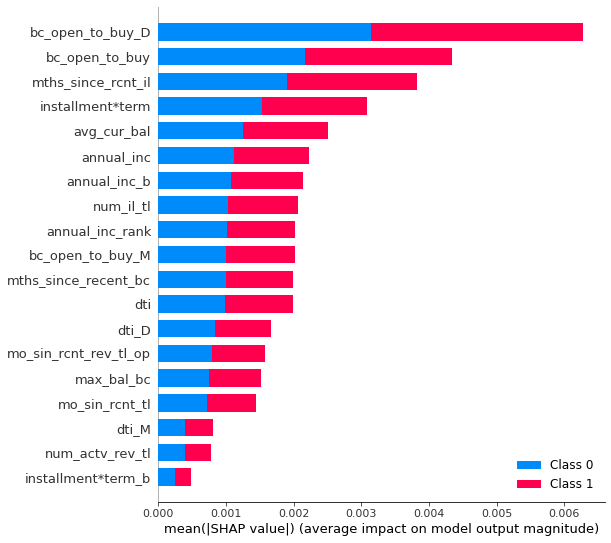

In [260]:
import shap
shap.initjs() #need this line of code to enable Javascript to see the graphs
explainer3 = shap.TreeExplainer(rfc_X3_best.best_estimator_) #remember to only explain the BEST model from the collection
shap_values3 = explainer3.shap_values(X_test4)
#Force plot
#for one observation/prediction, this is the 1st observation in X_test, indexed by '0'
shap.summary_plot(shap_values3, features=X_test4, feature_names=X_test4.columns)

After adding the 3 new features, I can see that the shap values has changed. "Installment*term" which used to be to have the highest magnitude in predicting has dropped. The highest now is the newly engineered column "bc_open_to_buy_D". 

The other feature engineered - annual_inc_b has moderate significance while bc_open_to_buy_M is not significant as it does not show up on the summary plot.

In [ ]:
print(rfc_X3_best.best_params_)

## Modeling with all new features

Balance majority and minority class with RandomOverSampler

In [329]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=randomstate)

x_ros, y_ros = ros.fit_resample(X, y)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_ros))

Original dataset shape Counter({1: 26978, 0: 7853})
Resample dataset shape Counter({1: 26978, 0: 26978})


Train test split new data:

In [330]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, #fit in resampled X and y data
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#note that y_test is the True Value/Label

((43164, 19), (10792, 19), (43164,), (10792,))

Build RFC model

In [331]:
param_grid_rfc = {'max_depth': range(5, 20, 5), 'n_estimators': range(50,150,50)}

In [332]:
#instantiate a new model based on new feature space X2
rfc_X1= GridSearchCV(RandomForestClassifier(random_state=randomstate),
                    param_grid = param_grid_rfc,
                    cv = StratifiedKFold(n_splits=5),
                    n_jobs=-1)
#build the model
rfc_X5_best=rfc_X1.fit(X_train, y_train) 

In [334]:
print(rfc_X5_best.best_params_)

{'max_depth': 15, 'n_estimators': 100}


In [335]:
# make predictions from the DTC test set
y21_rfc_pred_test=rfc_X5_best.best_estimator_.predict(X_test)

In [336]:
#predictions made in previous cells
print("Evaluation metric for RFC test:")
print('precision_score: {:.5f}'.format(precision_score(y_true=y_test, y_pred=y21_rfc_pred_test)))
print('accuracy_score: {:.5f}'.format(accuracy_score(y_true=y_test, y_pred=y21_rfc_pred_test)))
print('recall_score: {:.5f}'.format(recall_score(y_true=y_test, y_pred=y21_rfc_pred_test)))
print('matthews_corrcoef: {:.5f}'.format(matthews_corrcoef(y_true=y_test, y_pred=y21_rfc_pred_test)))
print()

Evaluation metric for RFC test:
precision_score: 0.88415
accuracy_score: 0.85730
recall_score: 0.82459
matthews_corrcoef: 0.71637



Evaluate model using classification report:

In [338]:
print("RFC model report:\n", classification_report(y_test, rfc_X5_best.best_estimator_.predict(X_test)))

RFC model report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      5359
           1       0.88      0.82      0.85      5433

    accuracy                           0.86     10792
   macro avg       0.86      0.86      0.86     10792
weighted avg       0.86      0.86      0.86     10792



## In conclusion...

Overall using the newly engineered features, the RFC model has improved. Model is able to predict charged off customers with a high recall of 0.89 and also high precision 0.83.

Recalling back, the recall and precision score for RFC model was approx 0.70++

Therefore, feature engineering has helped to create new useful features in predicting our target variable (charged off customers). There were many correlated features in the beginning and target leakages in the original dataset that was given. Thus I would recommend the company to perhaps only collect data that is only available to lenders prior to a loan to avoid any target leakages. 

This model only works best when majority and minority class of our target "loan_status" is balanced. Therefore, if the company wants to deploy this model, I would suggest for the company to collect more data of specifically "charged off" customers. 

With that being said, the company should not entirely rely on the model to and only as a secondary help in evaluating and gaining insights on potential customers.